In [926]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [927]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [928]:
#Start with spring and work our way down to winter
season = 1
season_year = 2001
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2001-03-01 to 2001-05-31
Columns: 281 entries, 10000009 to 22000047
dtypes: float64(281)
memory usage: 202.7 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-03-01  0.912103  0.773894  0.588163  0.914579  0.668449  1.282618   
2001-03-02  0.906730  0.779306  0.600544  0.906370  0.664244  1.278267   
2001-03-03  0.887021  0.767446  0.565988  0.891090  0.658062  1.240581   
2001-03-04  0.865170  0.756579  0.549264  0.871538  0.646120  1.164207   
2001-03-05  0.832631  0.727593  0.516864  0.847199  0.619039  1.116481   
...              ...       ...       ...       ...       ...       ...   
2001-05-27  0.703189  0.656086  0.426531  0.861046  0.511261  0.769320   
2001-05-28  0.696253  0.660488  0.416368  0.857577  0.527892  0.750255   
2001-05-29  0.709588  0.649016  0.404295  0.847514  0.542715  0.735395   
2001-05-30  0.723227  0.638693  0.393916  0.863272  0.547152  0.739459   
2001-05-31  0.721664  0.671080  0.391575  0.863769  0.575536  0.733514   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-03-01  1.072560  0.517907  

          2001-03-01  2001-03-02  2001-03-03  2001-03-04  2001-03-05  \
10000009   -0.052000   -0.050542   -0.049504   -0.049914   -0.050733   
10000010   -0.065103   -0.062621   -0.060909   -0.060295   -0.060736   
10000011   -0.082710   -0.079567   -0.080123   -0.080113   -0.080805   
10000014   -0.051765   -0.050577   -0.049116   -0.049305   -0.049345   
10000016   -0.075099   -0.073529   -0.071341   -0.070854   -0.071075   
...              ...         ...         ...         ...         ...   
7000003    -0.071929   -0.072099   -0.070966   -0.071701   -0.070232   
8000001    -0.066677   -0.065205   -0.064371   -0.066256   -0.068132   
9000001     0.017853    0.017816    0.019932    0.019343    0.017151   
9000015     0.012295    0.012429    0.014617    0.014223    0.012412   
22000047   -0.074678   -0.072861   -0.070693   -0.070291   -0.067628   

          2001-03-06  2001-03-07  2001-03-08  2001-03-09  2001-03-10  ...  \
10000009   -0.048559   -0.048819   -0.049789   -0.056414  

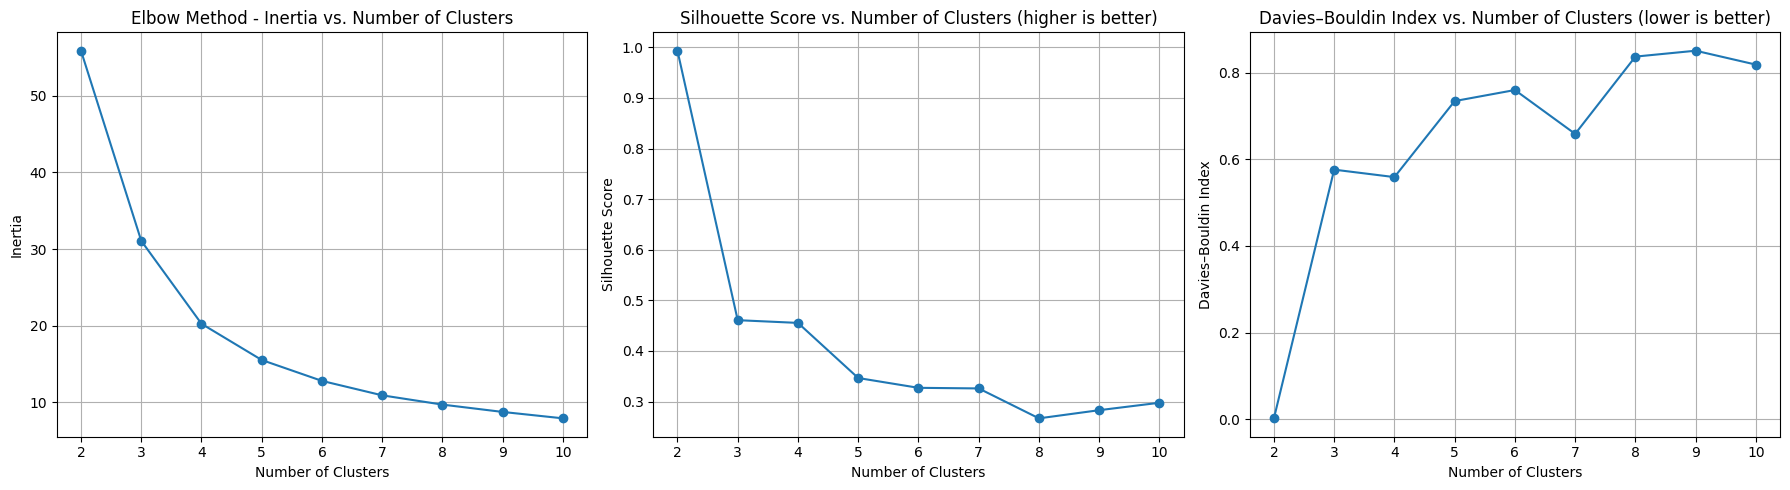

In [929]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np


data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-03-01  0.912103  0.773894  0.588163  0.914579  0.668449  1.282618   
2001-03-02  0.906730  0.779306  0.600544  0.906370  0.664244  1.278267   
2001-03-03  0.887021  0.767446  0.565988  0.891090  0.658062  1.240581   
2001-03-04  0.865170  0.756579  0.549264  0.871538  0.646120  1.164207   
2001-03-05  0.832631  0.727593  0.516864  0.847199  0.619039  1.116481   
...              ...       ...       ...       ...       ...       ...   
2001-05-27  0.703189  0.656086  0.426531  0.861046  0.511261  0.769320   
2001-05-28  0.696253  0.660488  0.416368  0.857577  0.527892  0.750255   
2001-05-29  0.709588  0.649016  0.404295  0.847514  0.542715  0.735395   
2001-05-30  0.723227  0.638693  0.393916  0.863272  0.547152  0.739459   
2001-05-31  0.721664  0.671080  0.391575  0.863769  0.575536  0.733514   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-03-01  1.072560  0.517907  

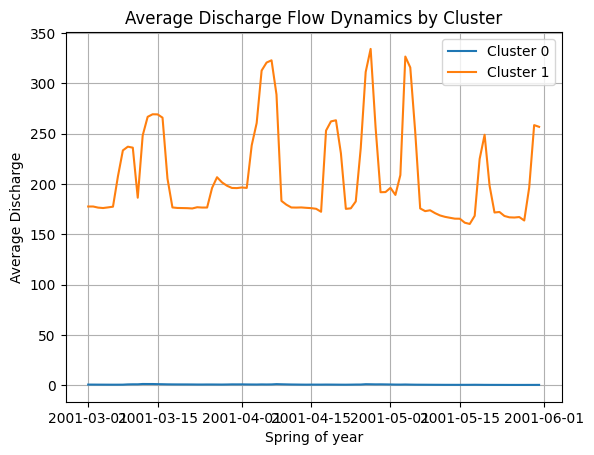

In [930]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [931]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [932]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2001-03-01  0.912103  0.773894  0.588163  0.914579  0.668449  1.282618   
2001-03-02  0.906730  0.779306  0.600544  0.906370  0.664244  1.278267   
2001-03-03  0.887021  0.767446  0.565988  0.891090  0.658062  1.240581   
2001-03-04  0.865170  0.756579  0.549264  0.871538  0.646120  1.164207   
2001-03-05  0.832631  0.727593  0.516864  0.847199  0.619039  1.116481   
...              ...       ...       ...       ...       ...       ...   
2001-05-27  0.703189  0.656086  0.426531  0.861046  0.511261  0.769320   
2001-05-28  0.696253  0.660488  0.416368  0.857577  0.527892  0.750255   
2001-05-29  0.709588  0.649016  0.404295  0.847514  0.542715  0.735395   
2001-05-30  0.723227  0.638693  0.393916  0.863272  0.547152  0.739459   
2001-05-31  0.721664  0.671080  0.391575  0.863769  0.575536  0.733514   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-03-01  1.072560  0.517907  1.029133  1.093139  ...  0.730531  0.784548   
2001-03-02  1.040571  0.503775  1.010683  1.099971  ...  0.713096  0.778828   
2001-03-03  1.009146  0.493119  0.997285  1.089561  ...  0.670189  0.691140   
2001-03-04  1.008625  0.476795  0.973395  1.070807  ...  0.638287  0.700078   
2001-03-05  1.008053  0.460320  0.941674  1.050402  ...  0.588332  0.620966   
...              ...       ...       ...       ...  ...       ...       ...   
2001-05-27  0.846745  0.488206  0.708178  0.923219  ...  0.026585  0.165125   
2001-05-28  0.847187  0.496519  0.702196  0.935607  ...  0.023246  0.161827   
2001-05-29  0.873065  0.526825  0.725729  0.951733  ...  0.021021  0.174898   
2001-05-30  0.854682  0.538841  0.739320  0.976078  ...  0.019042  0.219967   
2001-05-31  0.937014  0.545945  0.727334  0.986022  ...  0.019290  0.220364   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2001-03-01  0.494361  0.666997  0.782405  0.701888  0.757285  1.648929   
2001-03-02  0.424862  0.572013  0.716842  0.679321  0.752055  1.627856   
2001-03-03  0.404295  0.466317  0.684558  0.661995  0.731140  1.615052   
2001-03-04  0.359333  0.494975  0.686126  0.637263  0.694219  1.589636   
2001-03-05  0.363293  0.384011  0.626701  0.627889  0.649939  1.545418   
...              ...       ...       ...       ...       ...       ...   
2001-05-27  0.074081  0.103585  0.095239  0.481464  0.494014  1.361154   
2001-05-28  0.071832  0.108078  0.089146  0.481742  0.482279  1.349592   
2001-05-29  0.073909  0.125537  0.093216  0.488889  0.480577  1.348828   
2001-05-30  0.091558  0.147763  0.166638  0.495988  0.484206  1.368933   
2001-05-31  0.108988  0.135960  0.162952  0.534520  0.480543  1.397944   

             9000015  22000047  
2001-03-01  1.590295  0.672892  
2001-03-02  1.571028  0.671286  
2001-03-03  1.559323  0.664862  
2001-03-04  1.536086  0.652014  
2001-03-05  1.495659  0.655226  
...              ...       ...  
2001-05-27  1.327195  0.732312  
2001-05-28  1.316625  0.727494  
2001-05-29  1.315926  0.743553  
2001-05-30  1.334308  0.727494  
2001-05-31  1.360831  0.713040  

[92 rows x 281 columns]

<Axes: >

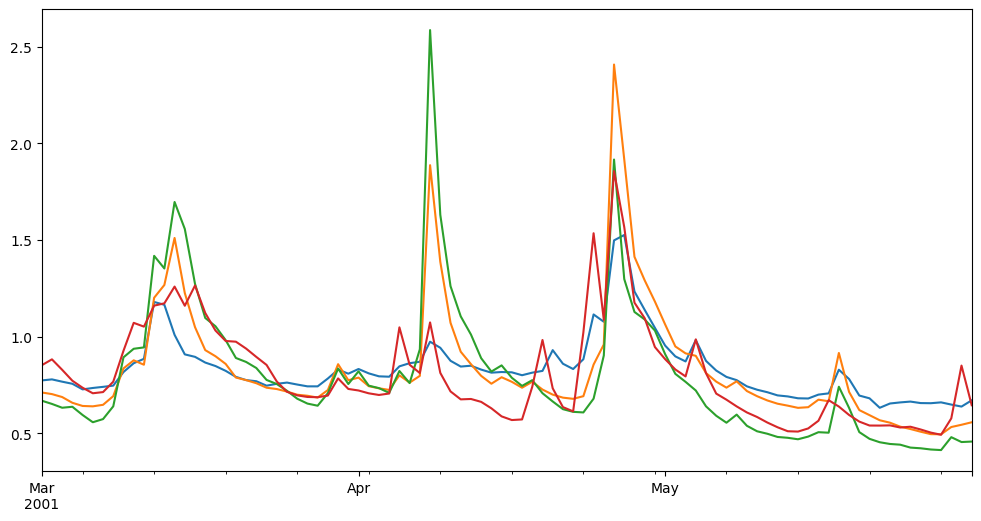

In [933]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

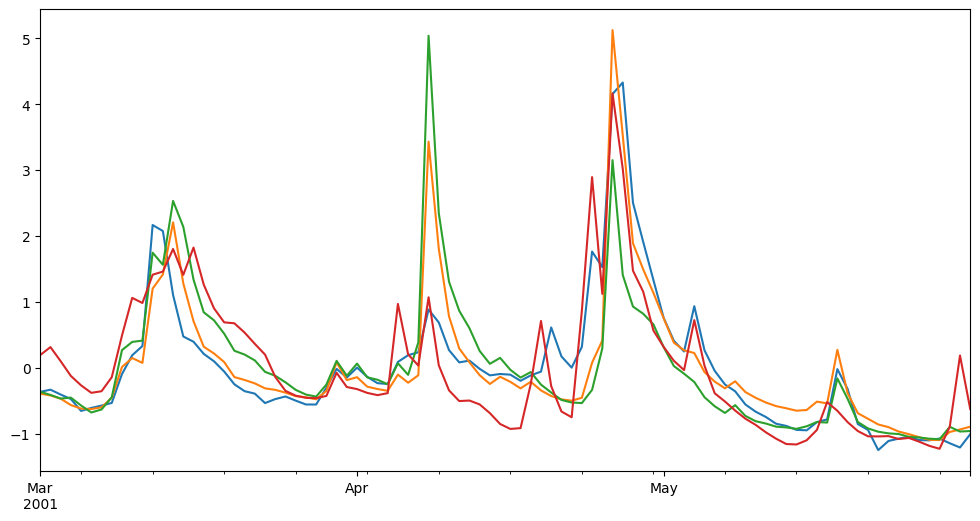

In [934]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

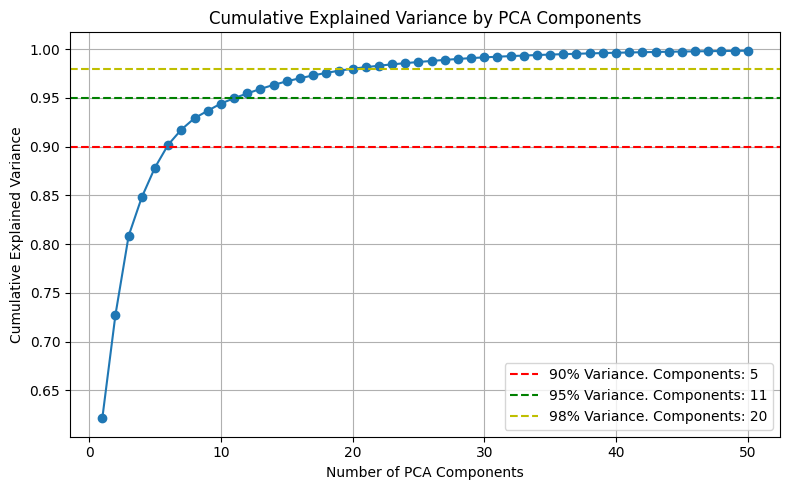

In [935]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [936]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 2.32580340e+00, -6.06142546e-01,  4.84047267e+00, ...,
         9.76400685e-01, -2.92714680e-02,  1.03819301e+00],
       [ 1.25360709e+00, -5.02400836e-01,  4.86075519e+00, ...,
         9.56879989e-01,  9.54267833e-02,  8.63024033e-01],
       [-7.20768338e-01, -6.01472540e-01,  4.67151368e+00, ...,
         5.94203168e-01,  1.26679442e-01,  4.47669884e-01],
       ...,
       [-2.03584380e+01,  3.58294026e+00,  8.22153979e-01, ...,
         5.16761881e-01, -6.40382613e-01,  5.58604458e-02],
       [-1.96631558e+01,  4.31083312e+00,  8.41700519e-01, ...,
         4.65081746e-01, -4.05138018e-01,  1.87275986e-02],
       [-1.78336824e+01,  4.22214303e+00,  1.13705465e+00, ...,
         2.33411872e+00, -1.41362630e+00,  2.01823111e-02]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_53892\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


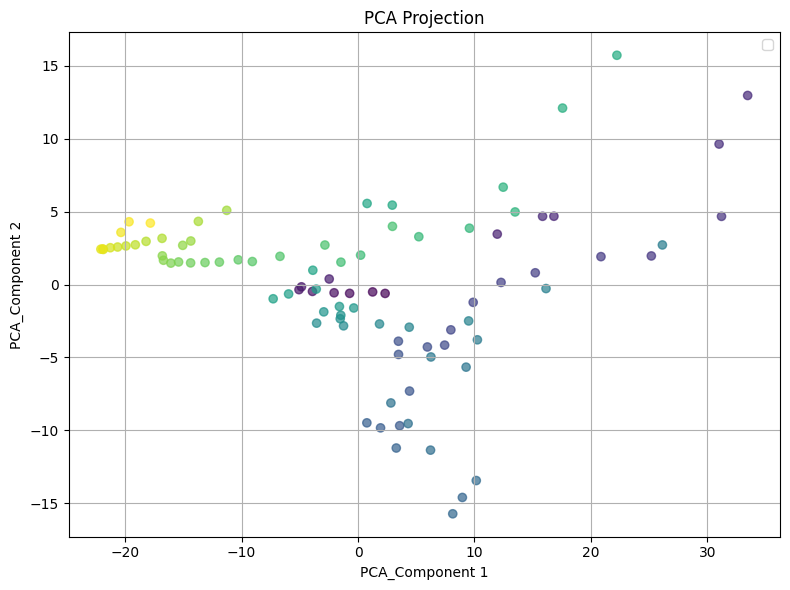

In [937]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_53892\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


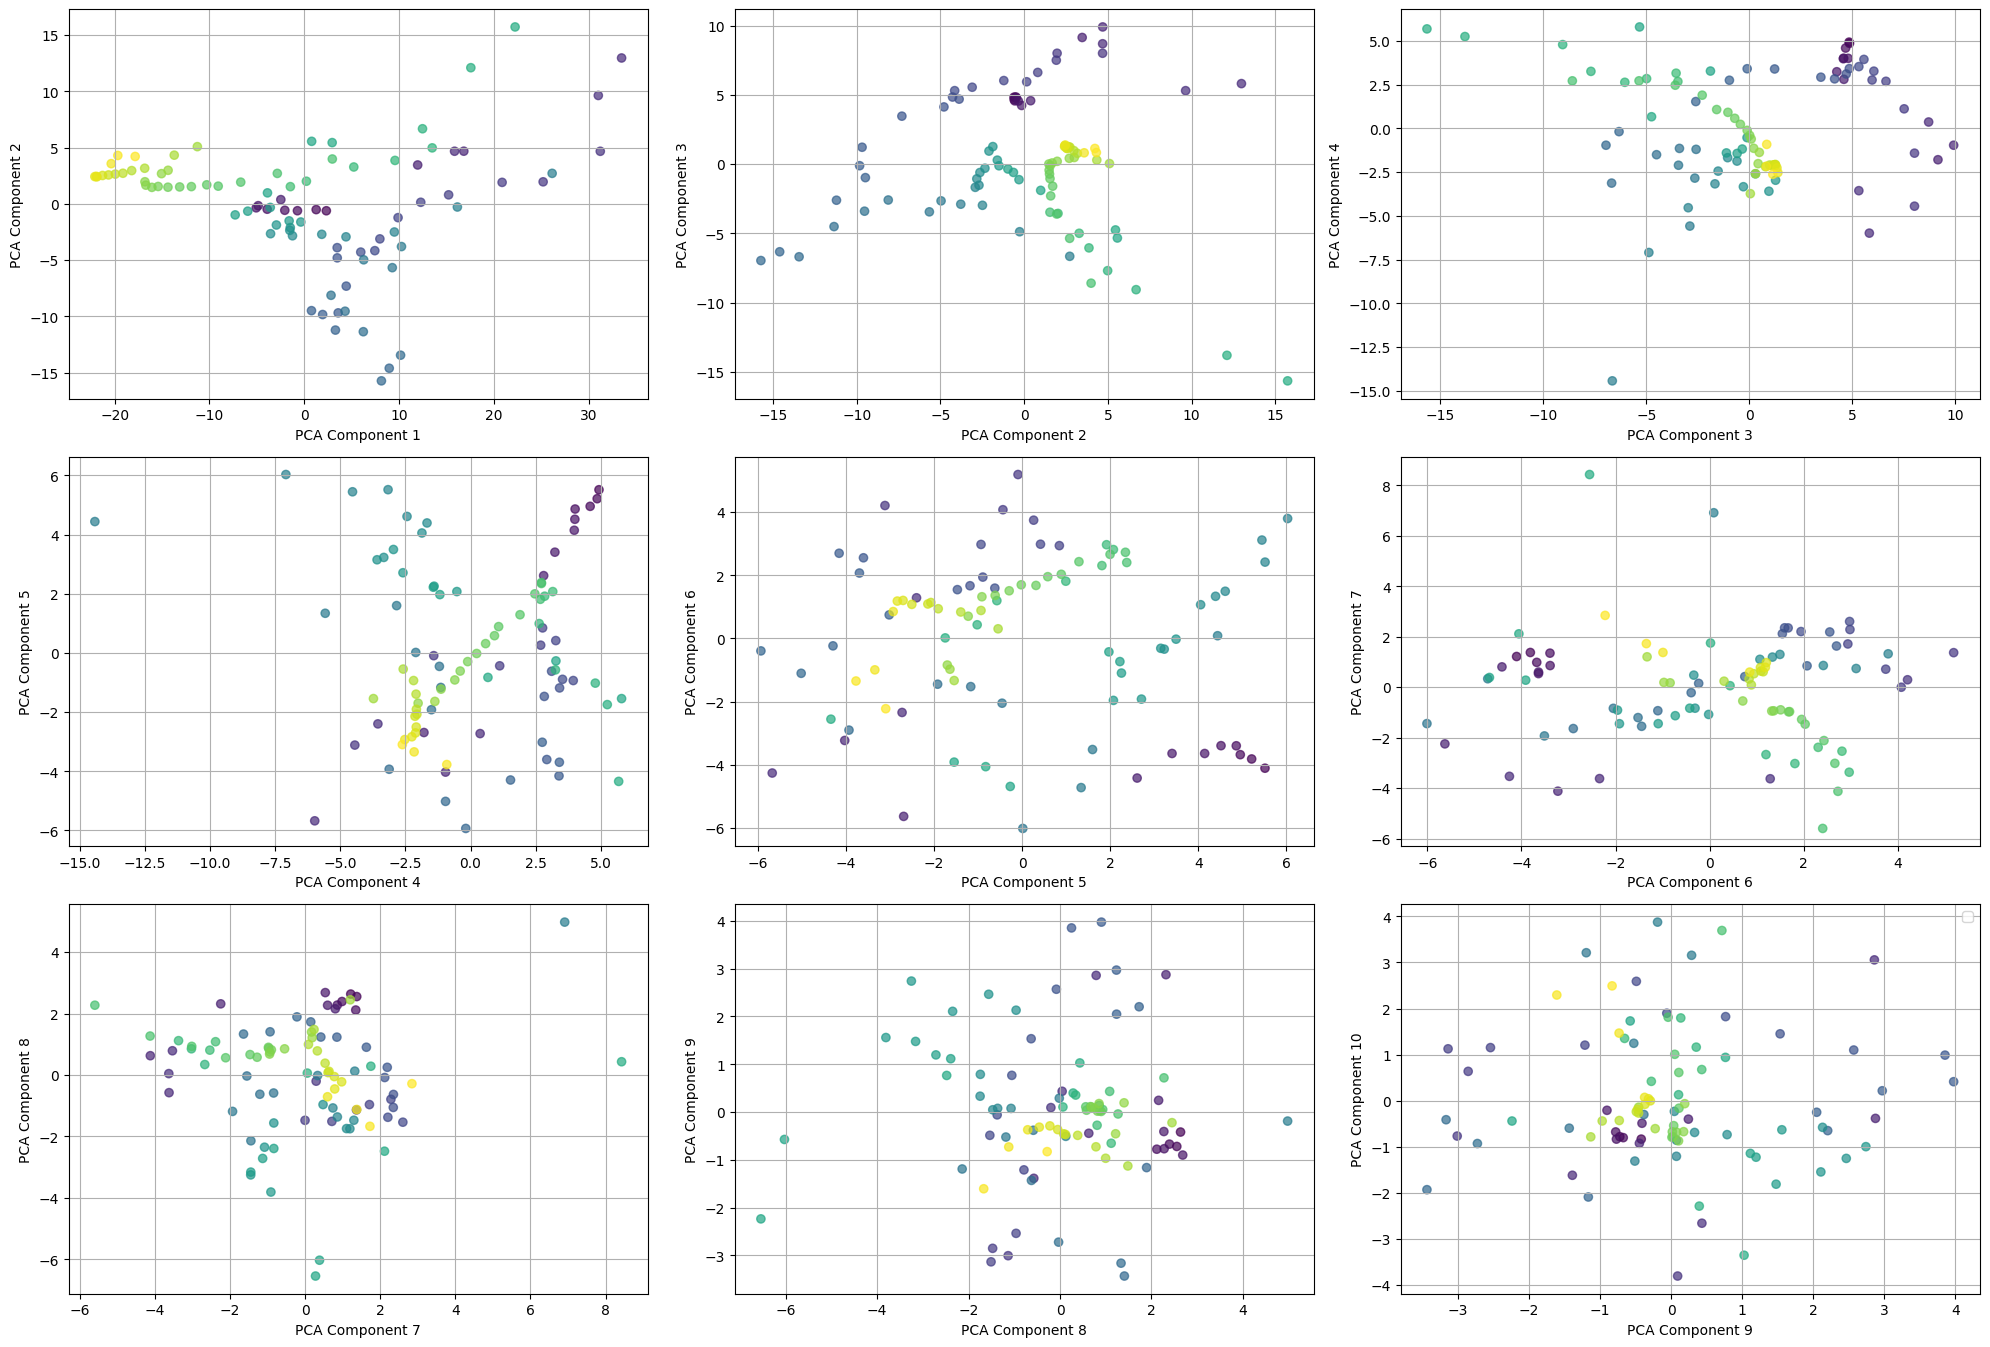

In [938]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [939]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.312
KMeans Davies-Bouldin Index is 1.314


<Axes: xlabel='k'>

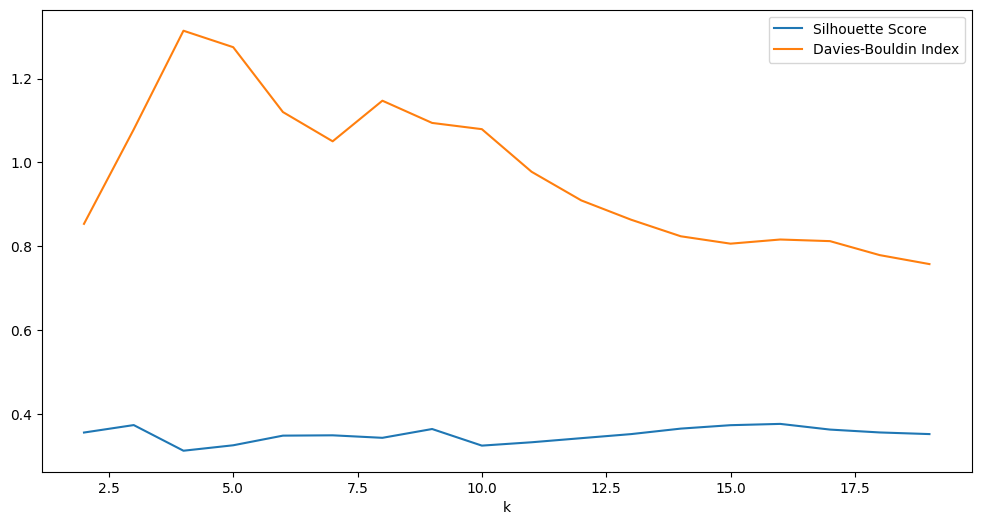

In [940]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

In [941]:
pca_array = pca.fit_transform(df_scaled)

pca_result = pd.DataFrame(
    pca_array,
    index=df_scaled.index,
    columns=[f"PCA{i+1}" for i in range(pca_array.shape[1])]
)

In [942]:
# eps_values = np.linspace(0.5, 13.0, 50)
# min_samples = 3

# dbscan_results = []

# for eps in eps_values:
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = dbscan.fit_predict(pca_result)

#     n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#     n_noise = list(labels).count(-1)

#     if n_clusters > 1:
#         silhouette = silhouette_score(pca_result, labels)
#         db_index = davies_bouldin_score(pca_result, labels)
#     else:
#         silhouette = None
#         db_index = None

#     dbscan_results.append({
#         "eps": round(eps, 2), 
#         "Min_Samples": min_samples,
#         "Clusters": n_clusters,
#         "Noise": n_noise,
#         "Silhouette Score": silhouette,
#         "Davies-Bouldin Index": db_index
#     })

# dbscan_eval_df = pd.DataFrame(dbscan_results)
# display(dbscan_eval_df)
# dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

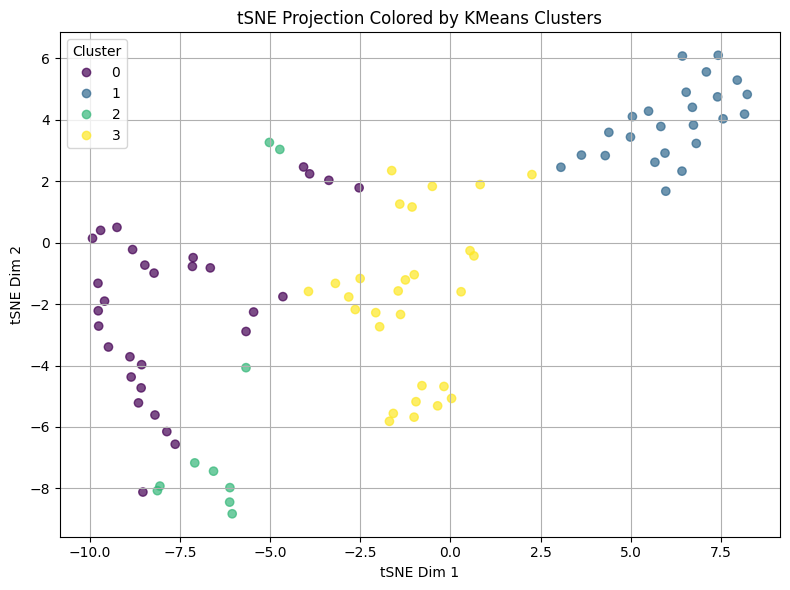

In [943]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        37    106          0.303222   
1    0.05            2        36     94          0.273745   
2    0.06            2        30     81          0.126763   
3    0.06            2        23     67          0.038643   
4    0.07            2        19     58          0.023064   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.829788   
196  0.99            2         2      2          0.829788   
197  0.99            2         2      2          0.829788   
198  1.00            2         2      2          0.829788   
199  1.00            2         2      2          0.829788   

     Davies-Bouldin Index  
0                0.594372  
1                0.643221  
2                0.648236  
3                0.762262  
4                0.813334  
..                    ...  
195              0.144507  
196              0.144507  
197              0.144507  
198              0.144507  
199              0.144507  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

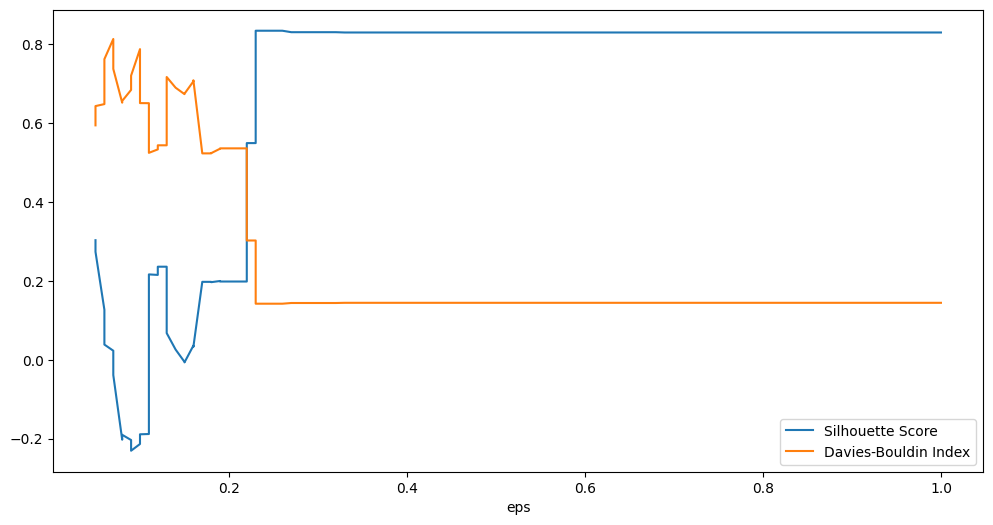

In [944]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [945]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [946]:
#Start with spring and work our way down to winter
season = 2
season_year = 2001
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2001-06-01 to 2001-08-31
Columns: 271 entries, 10000009 to 22000047
dtypes: float64(271)
memory usage: 195.5 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-06-01  0.807550  0.700394  0.376668  0.889074  0.575873  0.722396   
2001-06-02  0.862276  0.761758  0.502111  0.942683  0.728603  0.737054   
2001-06-03  1.783263  1.222805  1.454746  1.546499  1.611872  0.769227   
2001-06-04  1.817911  1.163202  1.237800  1.425186  0.943780  0.756558   
2001-06-05  1.076834  0.862423  0.680806  1.023699  0.718805  0.754080   
...              ...       ...       ...       ...       ...       ...   
2001-08-27  0.728511  0.472287  0.243926  0.704919  0.472279  0.489472   
2001-08-28  0.688435  0.470698  0.229820  0.679567  0.434706  0.488520   
2001-08-29  0.639490  0.468592  0.221689  0.648686  0.425371  0.476921   
2001-08-30  0.618370  0.553556  0.269366  0.639538  0.414606  0.475345   
2001-08-31  0.603535  0.594877  0.241400  0.633113  0.416876  0.463795   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-06-01  0.973140  0.547305  

          2001-06-01  2001-06-02  2001-06-03  2001-06-04  2001-06-05  \
10000009   -0.039541   -0.038995   -0.002410    0.003865   -0.034226   
10000010   -0.048088   -0.047417   -0.037324   -0.037303   -0.048021   
10000011   -0.073910   -0.069173   -0.022875   -0.032613   -0.059706   
10000014   -0.033038   -0.032257   -0.017159   -0.020830   -0.037644   
10000016   -0.058020   -0.050195   -0.013087   -0.051101   -0.057261   
...              ...         ...         ...         ...         ...   
7000003    -0.058662   -0.053230    0.051521    0.065122    0.019028   
8000001    -0.062616   -0.067256    0.037236    0.060798    0.005471   
9000001     0.008072    0.008617   -0.018448   -0.013841   -0.012185   
9000015     0.005067    0.005274   -0.021443   -0.016921   -0.014691   
22000047   -0.047976   -0.045713   -0.066379   -0.064499   -0.058768   

          2001-06-06  2001-06-07  2001-06-08  2001-06-09  2001-06-10  ...  \
10000009   -0.037222   -0.040772   -0.043928   -0.045712  

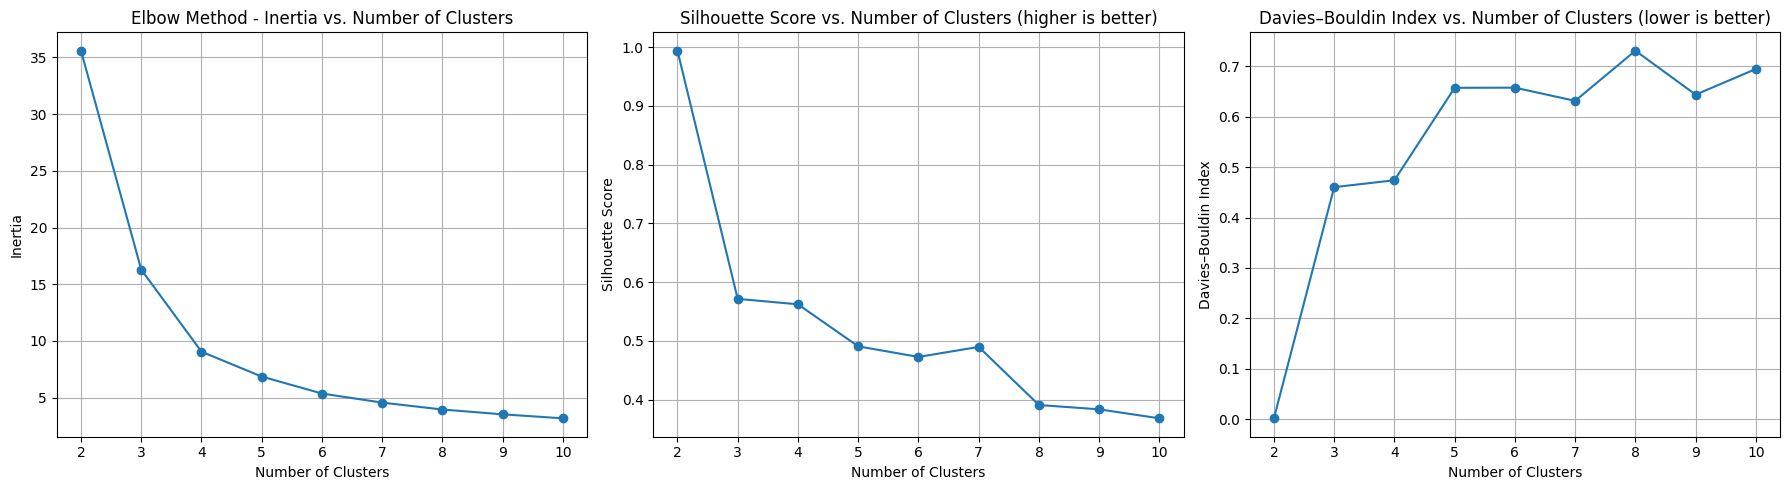

In [947]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        0
10000011        0
10000014        2
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-06-01  0.807550  0.700394  0.376668  0.889074  0.575873  0.722396   
2001-06-02  0.862276  0.761758  0.502111  0.942683  0.728603  0.737054   
2001-06-03  1.783263  1.222805  1.454746  1.546499  1.611872  0.769227   
2001-06-04  1.817911  1.163202  1.237800  1.425186  0.943780  0.756558   
2001-06-05  1.076834  0.862423  0.680806  1.023699  0.718805  0.754080   
...              ...       ...       ...       ...       ...       ...   
2001-08-27  0.728511  0.472287  0.243926  0.704919  0.472279  0.489472   
2001-08-28  0.688435  0.470698  0.229820  0.679567  0.434706  0.488520   
2001-08-29  0.639490  0.468592  0.221689  0.648686  0.425371  0.476921   
2001-08-30  0.618370  0.553556  0.269366  0.639538  0.414606  0.475345   
2001-08-31  0.603535  0.594877  0.241400  0.633113  0.416876  0.463795   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-06-01  0.973140  0.547305  

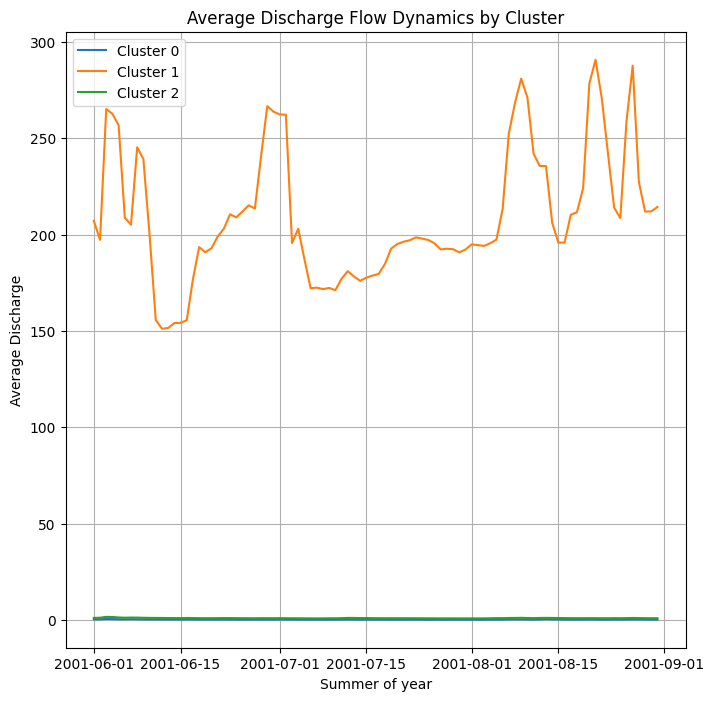

In [948]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [949]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [950]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2001-06-01  0.807550  0.700394  0.376668  0.889074  0.575873  0.722396   
2001-06-02  0.862276  0.761758  0.502111  0.942683  0.728603  0.737054   
2001-06-03  1.783263  1.222805  1.454746  1.546499  1.611872  0.769227   
2001-06-04  1.817911  1.163202  1.237800  1.425186  0.943780  0.756558   
2001-06-05  1.076834  0.862423  0.680806  1.023699  0.718805  0.754080   
...              ...       ...       ...       ...       ...       ...   
2001-08-27  0.728511  0.472287  0.243926  0.704919  0.472279  0.489472   
2001-08-28  0.688435  0.470698  0.229820  0.679567  0.434706  0.488520   
2001-08-29  0.639490  0.468592  0.221689  0.648686  0.425371  0.476921   
2001-08-30  0.618370  0.553556  0.269366  0.639538  0.414606  0.475345   
2001-08-31  0.603535  0.594877  0.241400  0.633113  0.416876  0.463795   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-06-01  0.973140  0.547305  0.732744  1.213050  ...  0.019784  0.181696   
2001-06-02  1.048870  0.685227  0.886783  1.169899  ...  0.020155  0.188603   
2001-06-03  1.195275  1.034680  1.533880  1.884798  ...  0.018424  0.204892   
2001-06-04  1.128805  0.942933  1.333466  2.029031  ...  0.017806  0.244447   
2001-06-05  1.008952  0.646836  0.983323  1.692024  ...  0.018795  0.195092   
...              ...       ...       ...       ...  ...       ...       ...   
2001-08-27  0.740714  0.345901  0.546530  0.616929  ...  0.011623  0.141798   
2001-08-28  0.692030  0.321037  0.517572  0.608024  ...  0.000247  0.239373   
2001-08-29  0.683926  0.306905  0.491008  0.594944  ... -0.006161  0.300231   
2001-08-30  0.654757  0.301917  0.470536  0.591123  ... -0.003825  0.249516   
2001-08-31  0.644775  0.349755  0.468062  0.590920  ...  0.000124  0.192716   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2001-06-01  0.100367  0.115044  0.132162  0.567829  0.518261  1.404462   
2001-06-02  0.086355  0.122726  0.138160  0.692387  0.524980  1.430509   
2001-06-03  0.113266  0.176685  0.269110  2.649002  2.419685  1.525815   
2001-06-04  0.190976  0.244932  0.325915  2.792070  2.723310  1.536325   
2001-06-05  0.165231  0.158908  0.225616  1.904537  1.693821  1.419404   
...              ...       ...       ...       ...       ...       ...   
2001-08-27  0.069349  0.059498  0.132117  0.187315  0.262906  0.768615   
2001-08-28  0.167073  0.095571  0.208642  0.188253  0.259209  0.697535   
2001-08-29  0.229400  0.115941  0.257592  0.181390  0.255934  0.713631   
2001-08-30  0.176812  0.075495  0.157637  0.187353  0.258990  0.730266   
2001-08-31  0.120740  0.053761  0.123623  0.168418  0.265793  0.739054   

             9000015  22000047  
2001-06-01  1.366790  0.701799  
2001-06-02  1.390604  0.782096  
2001-06-03  1.477737  0.756401  
2001-06-04  1.487346  0.730706  
2001-06-05  1.380451  0.695375  
...              ...       ...  
2001-08-27  0.785464  0.746765  
2001-08-28  0.720479  0.671286  
2001-08-29  0.735195  0.653620  
2001-08-30  0.750403  0.652014  
2001-08-31  0.758438  0.658438  

[92 rows x 271 columns]

<Axes: >

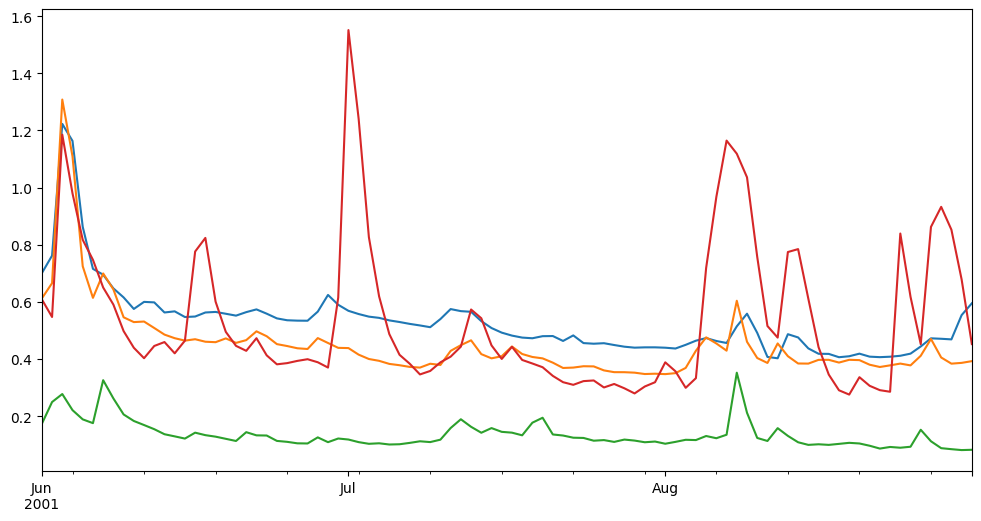

In [951]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

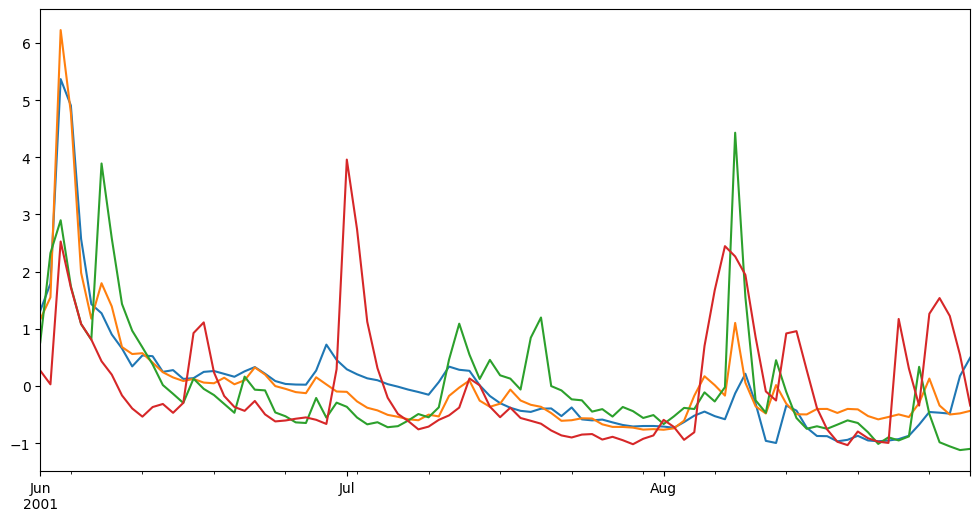

In [952]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

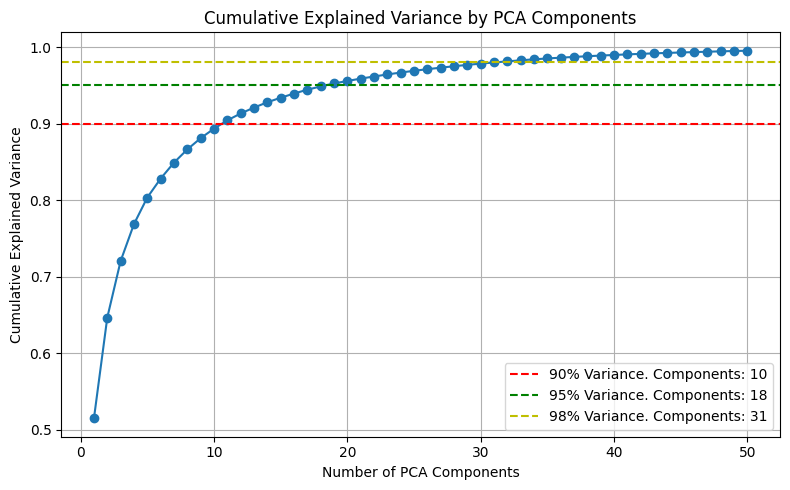

In [953]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [954]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[17.71618532, -2.04418114,  0.57812778, ...,  1.4361297 ,
         2.30731006,  0.73976513],
       [26.28909749, -2.71699944, -2.09063594, ...,  1.1968161 ,
         0.2352886 , -0.98901319],
       [47.97337841, -4.4283127 ,  1.16611089, ...,  0.33537933,
         0.74498295,  0.36702316],
       ...,
       [-2.77870108,  8.35747472, 11.57981654, ..., -2.22520722,
         0.41287626,  0.41779855],
       [-5.34380157,  6.17402466,  9.5239065 , ..., -2.01383171,
         0.83140985,  0.43858167],
       [-5.91929307,  4.70212719,  8.40768523, ..., -1.67194151,
         1.07570295,  0.60805753]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_53892\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


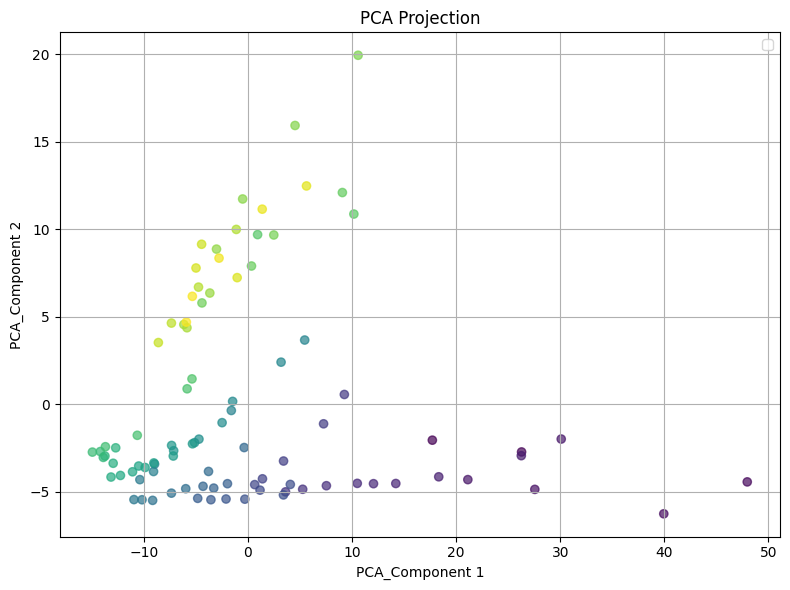

In [955]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_53892\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


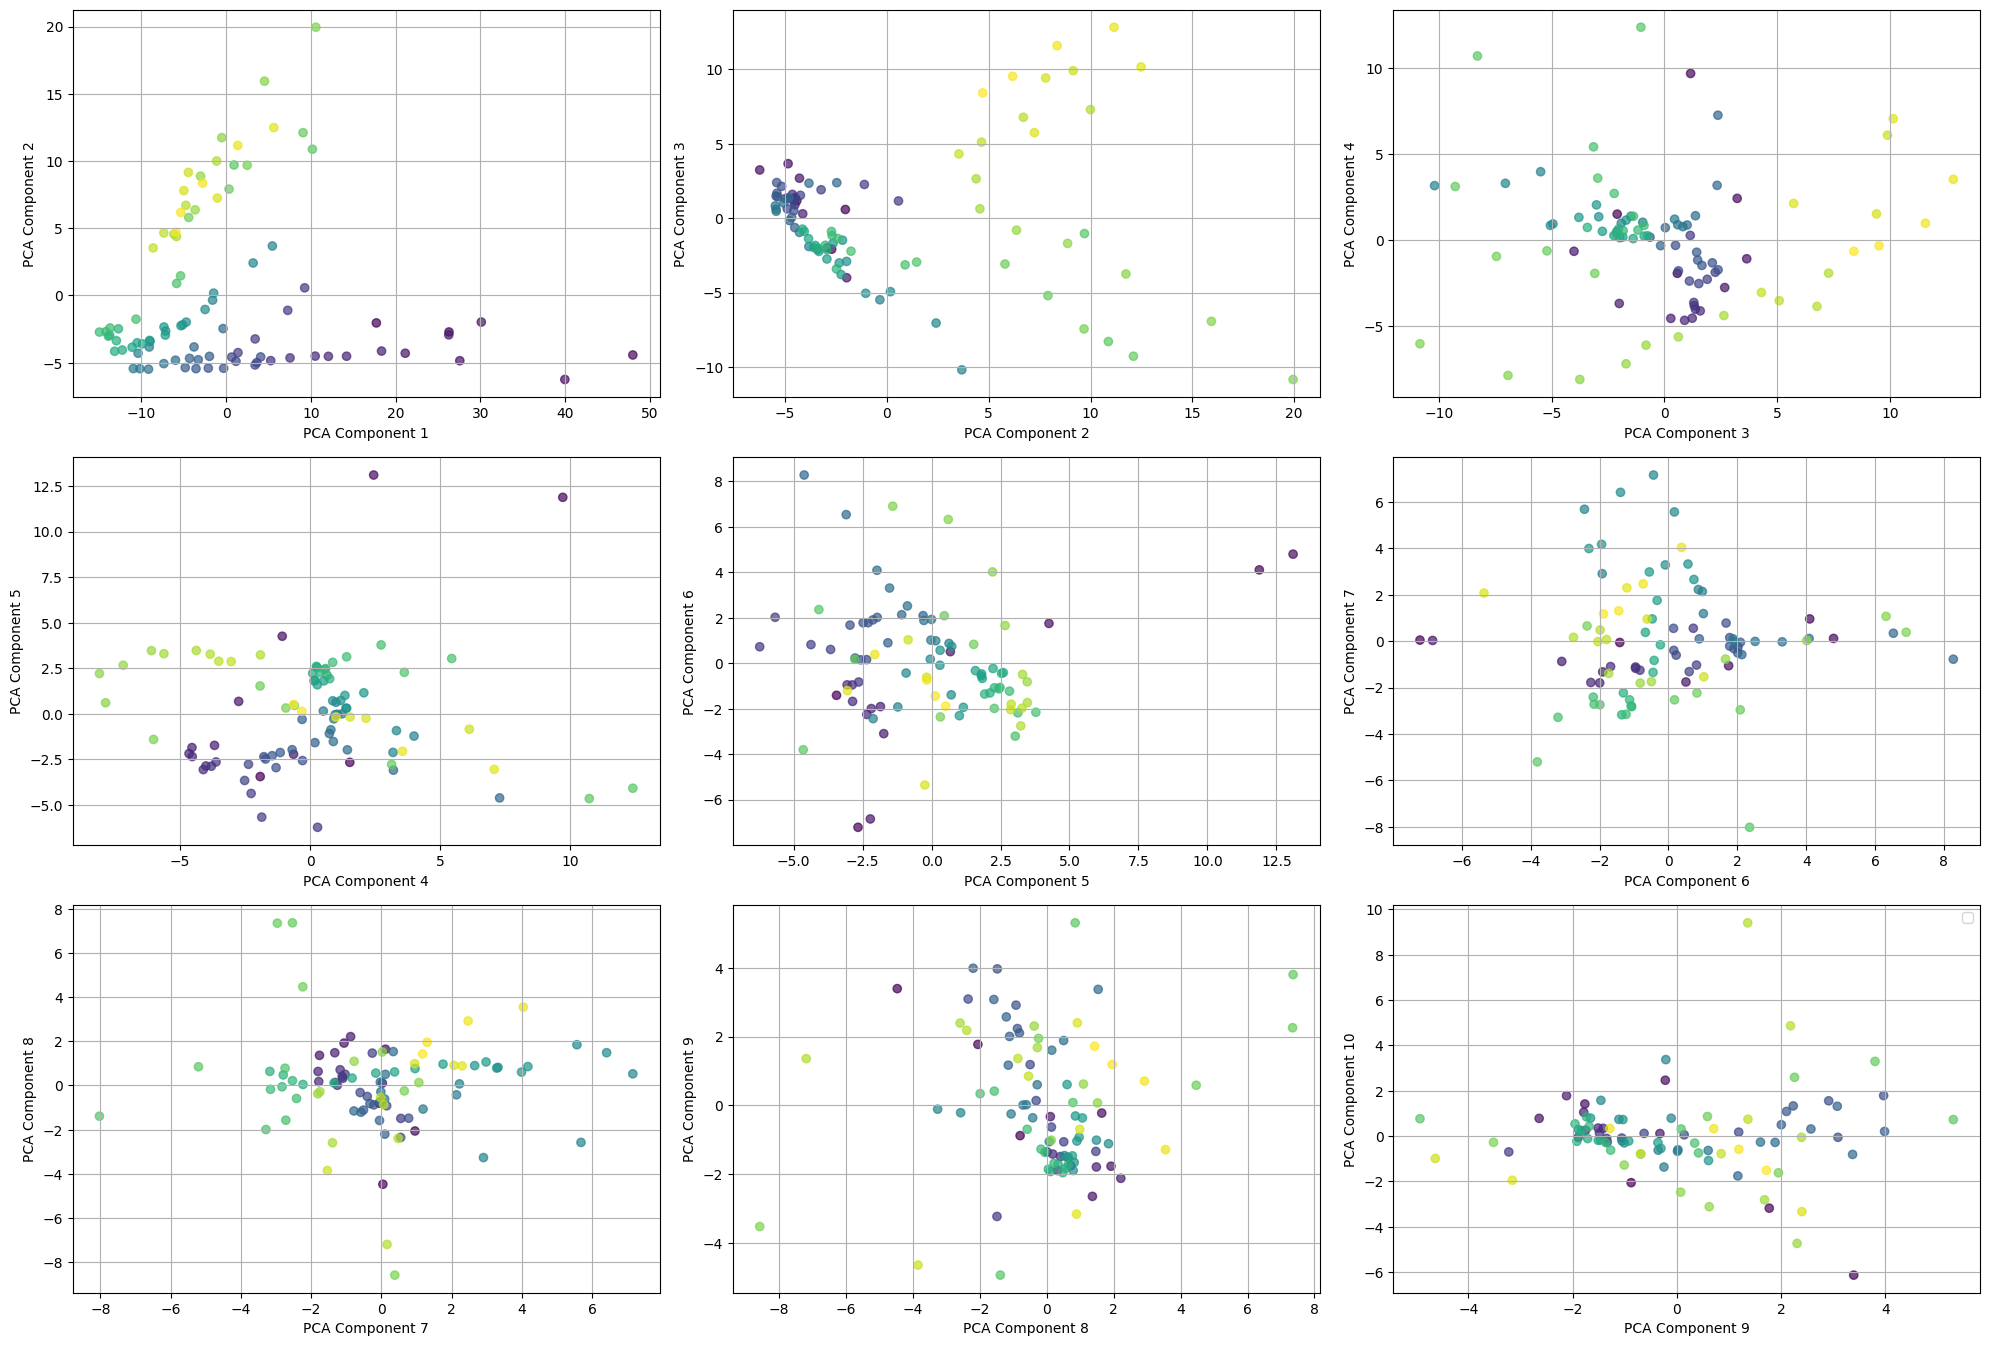

In [956]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [957]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.282
KMeans Davies-Bouldin Index is 1.401


<Axes: xlabel='k'>

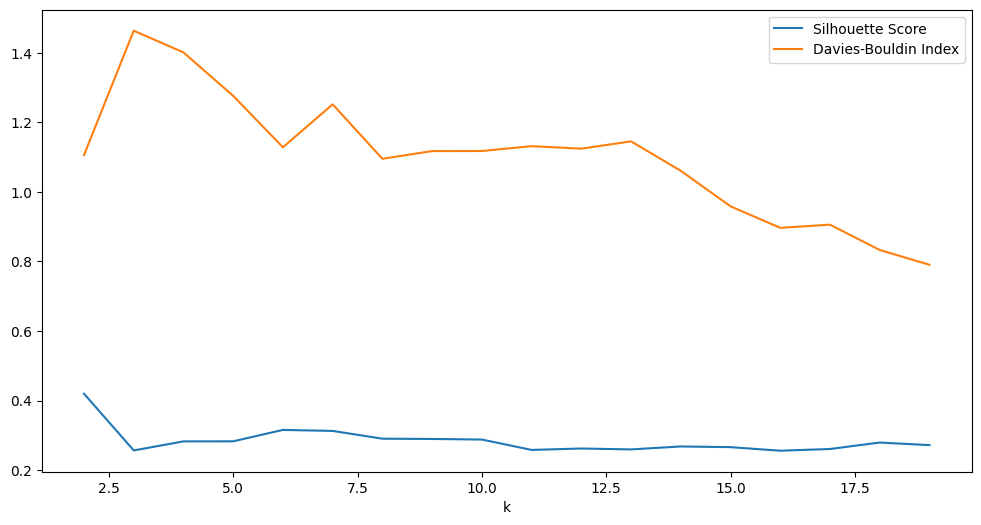

In [958]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         0     92               NaN   
4    1.52            3         0     92               NaN   
5    1.78            3         4     77         -0.167327   
6    2.03            3         4     77         -0.167327   
7    2.29            3         5     71         -0.146846   
8    2.54            3         6     67         -0.129161   
9    2.80            3         8     57         -0.073479   
10   3.05            3         9     54         -0.050859   
11   3.31            3         7     50         -0.019209   
12   3.56            3         6     50         -0.008290   
13   3.82            3         5     50          0.007090   
14   4.07            3         5     50          0.007090   
15   4.33            3         4     50          0.004681   
16   4.58            3         2     48          0.113832   
17   4.84            3         2     47          0.119811   
18   5.09            3         1     45               NaN   
19   5.35            3         2     41          0.094966   
20   5.60            3         3     35          0.066976   
21   5.86            3         3     34          0.072267   
22   6.11            3         3     30          0.119089   
23   6.37            3         3     28          0.124163   
24   6.62            3         3     28          0.124163   
25   6.88            3         3     26          0.124519   
26   7.13            3         3     25          0.123285   
27   7.39            3         3     23          0.131525   
28   7.64            3         2     22          0.170310   
29   7.90            3         2     22          0.170310   
30   8.15            3         2     20          0.155720   
31   8.41            3         2     18          0.165339   
32   8.66            3         2     18          0.165339   
33   8.92            3         2     17          0.179410   
34   9.17            3         2     16          0.185197   
35   9.43            3         2     12          0.164229   
36   9.68            3         2     12          0.164229   
37   9.94            3         2     11          0.175397   
38  10.19            3         2     11          0.175397   
39  10.45            3         1     11               NaN   
40  10.70            3         1      9               NaN   
41  10.96            3         1      8               NaN   
42  11.21            3         1      8               NaN   
43  11.47            3         1      8               NaN   
44  11.72            3         1      8               NaN   
45  11.98            3         1      8               NaN   
46  12.23            3         1      8               NaN   
47  12.49            3         1      6               NaN   
48  12.74            3         1      6               NaN   
49  13.00            3         1      6               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               1.327187  
6               1.327187  
7               1.544988  
8               1.591216  
9               1.579413  
10              1.567325  
11              1.541626  
12              1.604745  
13              1.647004  
14              1.647004  
15              1.714057  
16              2.037168  
17              2.080111  
18                   NaN  
19              1.882313  
20              1.681505  
21              1.652206  
22              1.595303  
23              1.600626  
24              1.600626  
25              1.632498  
26              1.645714  
27              1.560618  
28              1.698911  
29              1.698911  
30              1.800880  
31              1.696734  
32 

<Axes: xlabel='eps'>

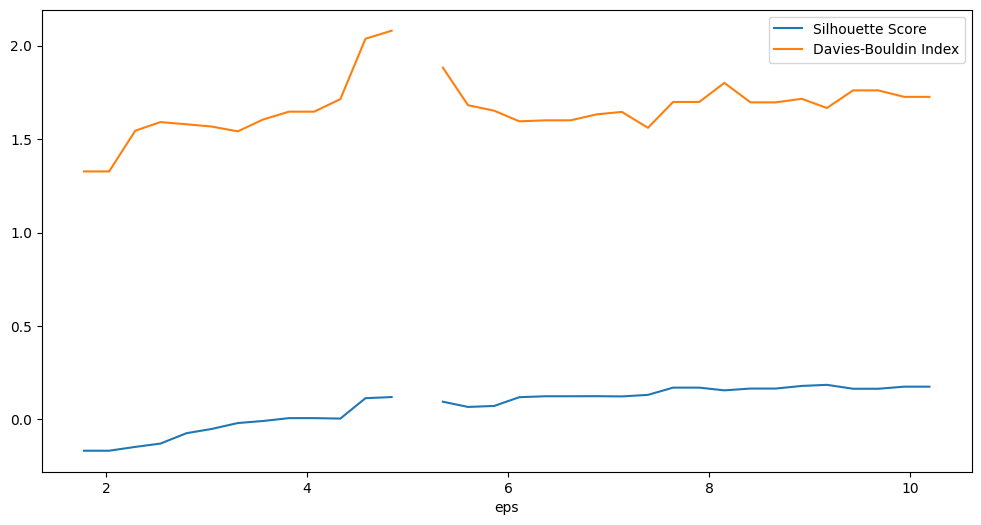

In [959]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

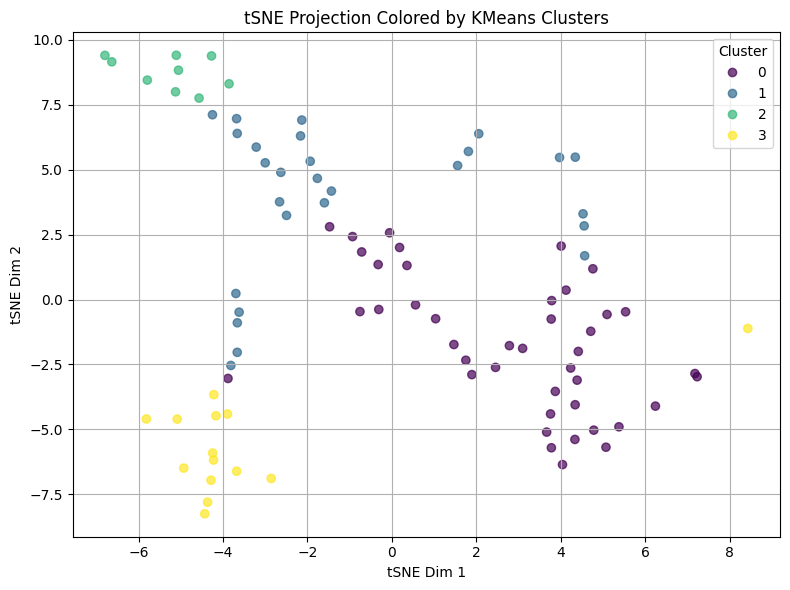

In [960]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        11     41          0.350739              0.496717
1   0.07            2         7     24          0.089669              0.580968
2   0.09            2         6     19          0.031373              0.681719
3   0.11            2         4     13          0.255439              0.614991
4   0.13            2         4     12          0.255810              0.614231
5   0.15            2         2     10          0.642585              0.291436
6   0.17            2         2      8          0.640948              0.292718
7   0.19            2         1      6               NaN                   NaN
8   0.21            2         1      6               NaN                   NaN
9   0.22            2         1      6               NaN                   NaN
10  0.24            2         2      4          0.761361              0.234747
11  0.26            2         2      4          0.761361              0.234747
12  0.28            2         2      4          0.761361              0.234747
13  0.30            2         2      4          0.761361              0.234747
14  0.32            2         2      4          0.761361              0.234747
15  0.34            2         2      3          0.760394              0.235266
16  0.36            2         2      3          0.760394              0.235266
17  0.38            2         2      2          0.759176              0.236144
18  0.40            2         2      2          0.759176              0.236144
19  0.42            2         2      2          0.759176              0.236144
20  0.44            2         2      2          0.759176              0.236144
21  0.46            2         2      2          0.759176              0.236144
22  0.48            2         1      2               NaN                   NaN
23  0.50            2         1      2               NaN                   NaN
24  0.52            2         1      2               NaN                   NaN
25  0.53            2         1      2               NaN                   NaN
26  0.55            2         1      2               NaN                   NaN
27  0.57            2         1      2               NaN                   NaN
28  0.59            2         1      2               NaN                   NaN
29  0.61            2         1      2               NaN                   NaN
30  0.63            2         1      2               NaN                   NaN
31  0.65            2         1      2               NaN                   NaN
32  0.67            2         1      1               NaN                   NaN
33  0.69            2         1      1               NaN                   NaN
34  0.71            2         1      1               NaN                   NaN
35  0.73            2         1      1               NaN                   NaN
36  0.75            2         1      1               NaN                   NaN
37  0.77            2         1      1               NaN                   NaN
38  0.79            2         1      1               NaN                   NaN
39  0.81            2         1      1               NaN                   NaN
40  0.83            2         1      1               NaN                   NaN
41  0.84            2         1      1               NaN                   NaN
42  0.86            2         1      1               NaN                   NaN
43  0.88            2         1      1               NaN                   NaN
44  0.90            2         1      1               NaN                   NaN
45  0.92            2         1      1               NaN                   NaN
46  0.94            2         1      1               NaN                   NaN
47  0.96            2         1      1               NaN                   NaN
48  0.98            2         1      1               NaN                   NaN
49  1.00            2         1      1               Na

<Axes: xlabel='eps'>

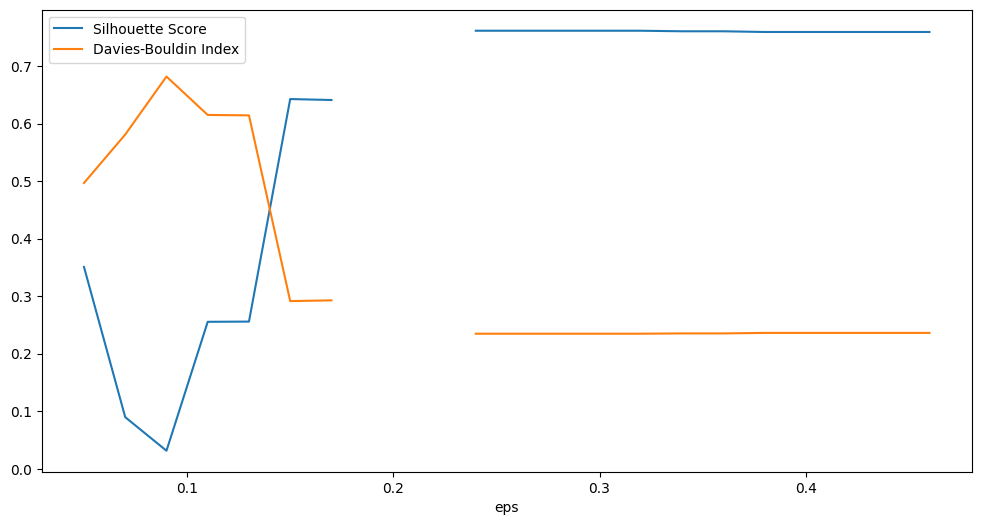

In [961]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [962]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [963]:
#Start with spring and work our way down to winter
season = 3
season_year = 2001
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2001-09-01 to 2001-11-30
Columns: 276 entries, 10000009 to 22000047
dtypes: float64(276)
memory usage: 196.9 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-09-01  0.616646  0.533651  0.207614  0.638791  0.417066  0.455190   
2001-09-02  0.651710  0.525917  0.209277  0.653979  0.426149  0.467634   
2001-09-03  0.779838  0.562481  0.249932  0.709475  0.481404  0.474961   
2001-09-04  0.774834  0.589629  0.278513  0.707308  0.583379  0.492671   
2001-09-05  0.766471  0.604709  0.277250  0.703686  0.545028  0.498758   
...              ...       ...       ...       ...       ...       ...   
2001-11-26  1.364738  0.773886  0.741787  1.093993  0.732031  0.994832   
2001-11-27  1.456959  0.763924  0.733625  1.068813  0.637941  1.010797   
2001-11-28  1.318399  0.749043  0.731716  1.081274  0.701228  1.060003   
2001-11-29  1.435205  0.761516  0.806772  1.078187  0.671035  1.125172   
2001-11-30  1.204970  0.695870  0.676956  0.992365  0.614539  1.155816   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-09-01  0.664917  0.356784  

          2001-09-01  2001-09-02  2001-09-03  2001-09-04  2001-09-05  \
10000009   -0.044716   -0.042788   -0.034419   -0.036960   -0.036524   
10000010   -0.051108   -0.052336   -0.050780   -0.050986   -0.048761   
10000011   -0.076219   -0.076370   -0.074305   -0.074548   -0.073531   
10000014   -0.043010   -0.042616   -0.039715   -0.042074   -0.041273   
10000016   -0.060087   -0.059909   -0.056882   -0.051460   -0.053275   
...              ...         ...         ...         ...         ...   
7000003    -0.079257   -0.079077   -0.078909   -0.081068   -0.079706   
8000001    -0.071207   -0.070960   -0.070328   -0.071579   -0.068737   
9000001    -0.035737   -0.035411   -0.032426   -0.026027   -0.023839   
9000015    -0.034205   -0.034004   -0.031401   -0.025729   -0.023638   
22000047   -0.041744   -0.038499   -0.038238   -0.036410   -0.039472   

          2001-09-06  2001-09-07  2001-09-08  2001-09-09  2001-09-10  ...  \
10000009   -0.036223   -0.043387   -0.052268   -0.058146  

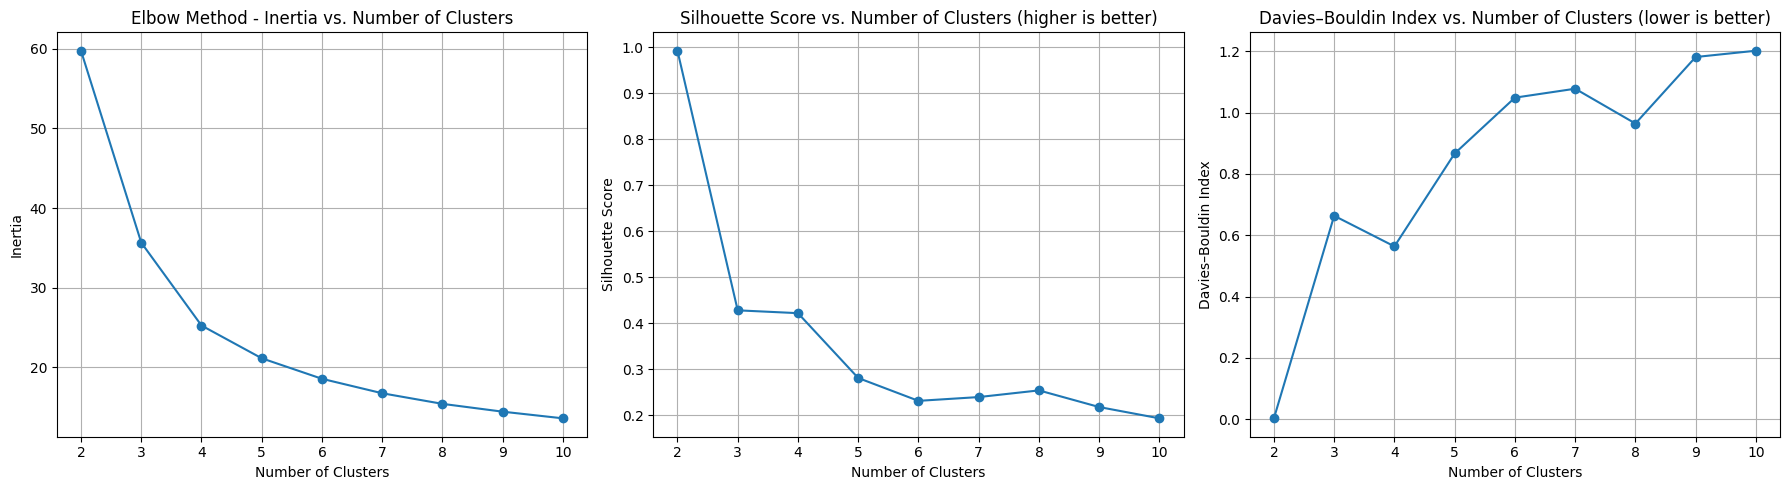

In [964]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-09-01  0.616646  0.533651  0.207614  0.638791  0.417066  0.455190   
2001-09-02  0.651710  0.525917  0.209277  0.653979  0.426149  0.467634   
2001-09-03  0.779838  0.562481  0.249932  0.709475  0.481404  0.474961   
2001-09-04  0.774834  0.589629  0.278513  0.707308  0.583379  0.492671   
2001-09-05  0.766471  0.604709  0.277250  0.703686  0.545028  0.498758   
...              ...       ...       ...       ...       ...       ...   
2001-11-26  1.364738  0.773886  0.741787  1.093993  0.732031  0.994832   
2001-11-27  1.456959  0.763924  0.733625  1.068813  0.637941  1.010797   
2001-11-28  1.318399  0.749043  0.731716  1.081274  0.701228  1.060003   
2001-11-29  1.435205  0.761516  0.806772  1.078187  0.671035  1.125172   
2001-11-30  1.204970  0.695870  0.676956  0.992365  0.614539  1.155816   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-09-01  0.664917  0.356784  

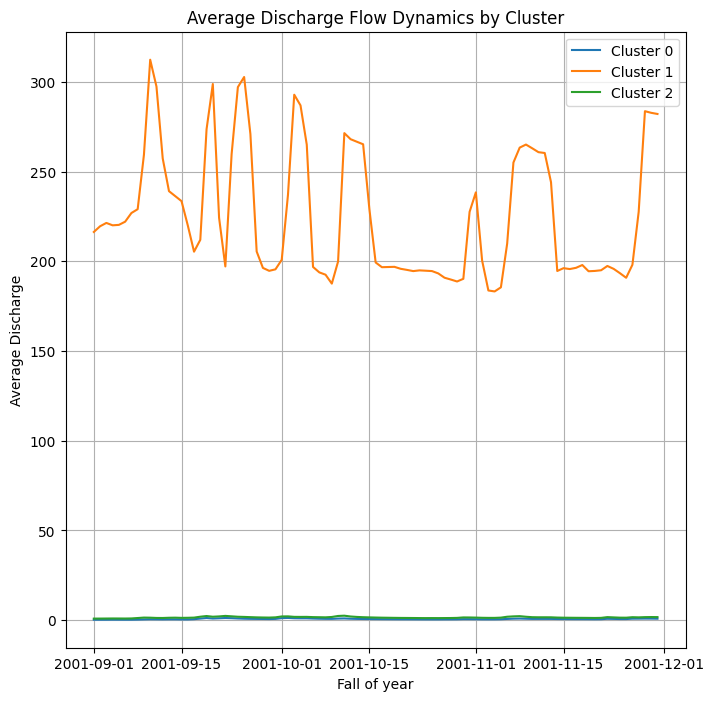

In [965]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [966]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [967]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2001-09-01  0.616646  0.533651  0.207614  0.638791  0.417066  0.455190   
2001-09-02  0.651710  0.525917  0.209277  0.653979  0.426149  0.467634   
2001-09-03  0.779838  0.562481  0.249932  0.709475  0.481404  0.474961   
2001-09-04  0.774834  0.589629  0.278513  0.707308  0.583379  0.492671   
2001-09-05  0.766471  0.604709  0.277250  0.703686  0.545028  0.498758   
...              ...       ...       ...       ...       ...       ...   
2001-11-26  1.364738  0.773886  0.741787  1.093993  0.732031  0.994832   
2001-11-27  1.456959  0.763924  0.733625  1.068813  0.637941  1.010797   
2001-11-28  1.318399  0.749043  0.731716  1.081274  0.701228  1.060003   
2001-11-29  1.435205  0.761516  0.806772  1.078187  0.671035  1.125172   
2001-11-30  1.204970  0.695870  0.676956  0.992365  0.614539  1.155816   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-09-01  0.664917  0.356784  0.489529  0.596248  ...  0.000124  0.167764   
2001-09-02  0.685941  0.401674  0.508752  0.605387  ... -0.001205  0.149710   
2001-09-03  0.795871  0.432206  0.572159  0.623014  ...  0.007914  0.137741   
2001-09-04  0.929848  0.391472  0.552906  0.621930  ...  0.027451  0.146058   
2001-09-05  0.968138  0.377415  0.532895  0.623271  ...  0.019419  0.170401   
...              ...       ...       ...       ...  ...       ...       ...   
2001-11-26  1.405703  1.059015  1.779139  1.037596  ...  0.855789  0.519913   
2001-11-27  1.311966  0.855873  1.435178  1.067295  ...  0.887444  0.569758   
2001-11-28  1.867365  0.891014  1.414417  1.055933  ...  0.920583  1.164619   
2001-11-29  1.885025  0.837886  1.371422  1.087537  ...  0.951990  1.569662   
2001-11-30  1.591879  0.752639  1.172680  1.018885  ...  0.956318  1.362194   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2001-09-01  0.095503  0.046590  0.108224  0.168166  0.272687  0.733230   
2001-09-02  0.077239  0.039920  0.139705  0.173607  0.280546  0.748907   
2001-09-03  0.063613  0.038237  0.182622  0.188761  0.302770  0.806324   
2001-09-04  0.073943  0.369476  0.324412  0.192418  0.317720  0.919198   
2001-09-05  0.097230  0.187190  0.286807  0.195621  0.340629  0.934156   
...              ...       ...       ...       ...       ...       ...   
2001-11-26  0.785246  0.672610  1.362064  1.160381  1.148032  1.469881   
2001-11-27  0.754662  0.668478  1.350396  1.145608  1.234969  1.513876   
2001-11-28  0.999879  1.542614  1.948966  1.032474  1.125150  1.699117   
2001-11-29  1.455370  1.931168  2.283762  1.122796  1.156863  1.941517   
2001-11-30  1.495818  1.454753  2.292428  0.947586  1.049298  1.868003   

             9000015  22000047  
2001-09-01  0.753113  0.655226  
2001-09-02  0.767446  0.708222  
2001-09-03  0.819940  0.729100  
2001-09-04  0.923136  0.782096  
2001-09-05  0.936811  0.727494  
...              ...       ...  
2001-11-26  1.426599  0.936267  
2001-11-27  1.466822  0.865605  
2001-11-28  1.636179  0.961962  
2001-11-29  1.857795  0.913784  
2001-11-30  1.790584  0.883271  

[91 rows x 276 columns]

<Axes: >

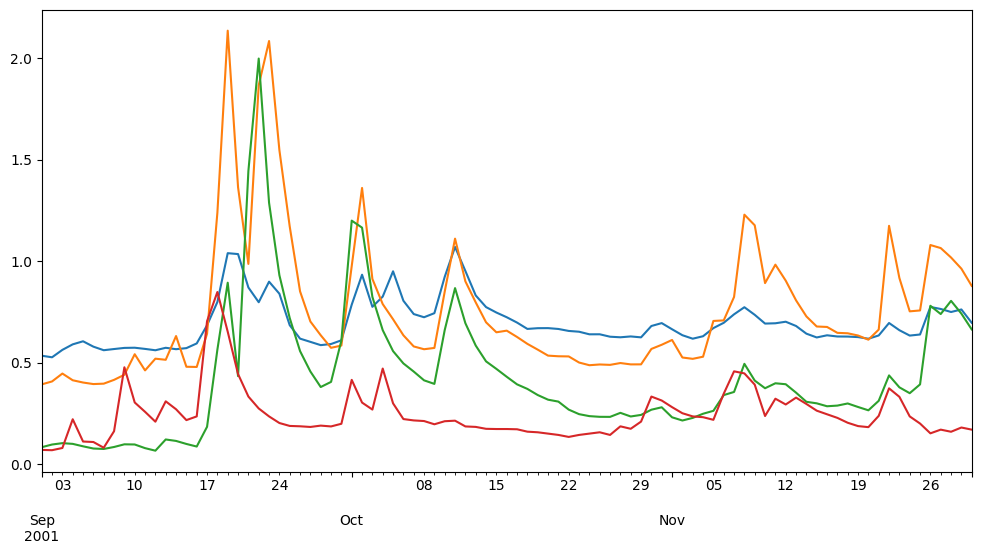

In [968]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

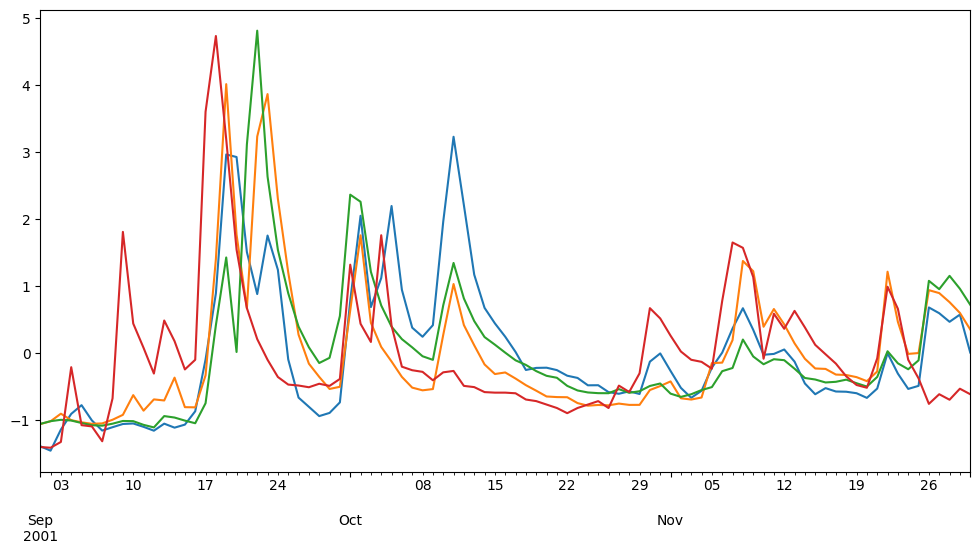

In [969]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

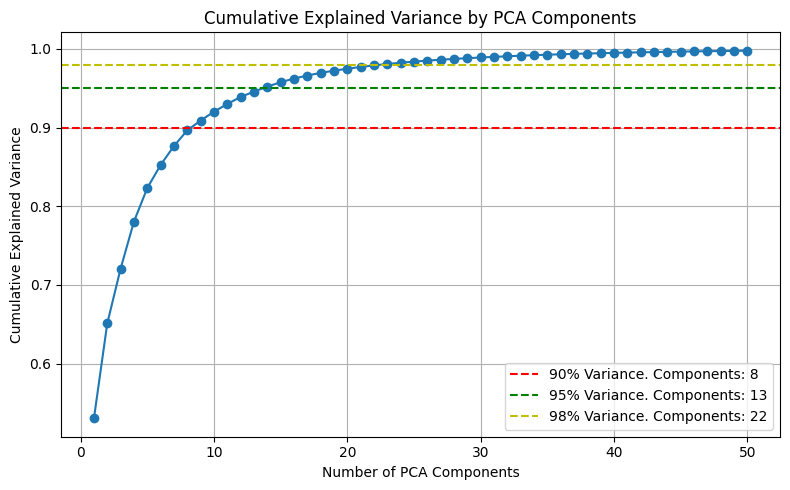

In [970]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [971]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-22.64941236,  -3.98270395,  -1.28360045, ...,  -0.17227774,
          0.5503691 ,  -0.42569815],
       [-22.37092685,  -4.41846843,  -0.66391625, ...,   0.0524306 ,
          0.38991522,  -0.44628147],
       [-21.58543464,  -4.55555321,  -0.20814838, ...,  -0.11201066,
          0.2985672 ,  -0.227558  ],
       ...,
       [ 10.94701024,   3.15028025,  -1.19585138, ...,   1.92353235,
          0.87267772,  -0.10746836],
       [ 10.86647581,   4.33407786,  -0.79148184, ...,   2.02180212,
         -0.0651325 ,  -0.7366979 ],
       [  8.74331616,   4.96954619,  -1.6090846 , ...,   1.76725362,
         -0.39043024,  -1.47298815]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_53892\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


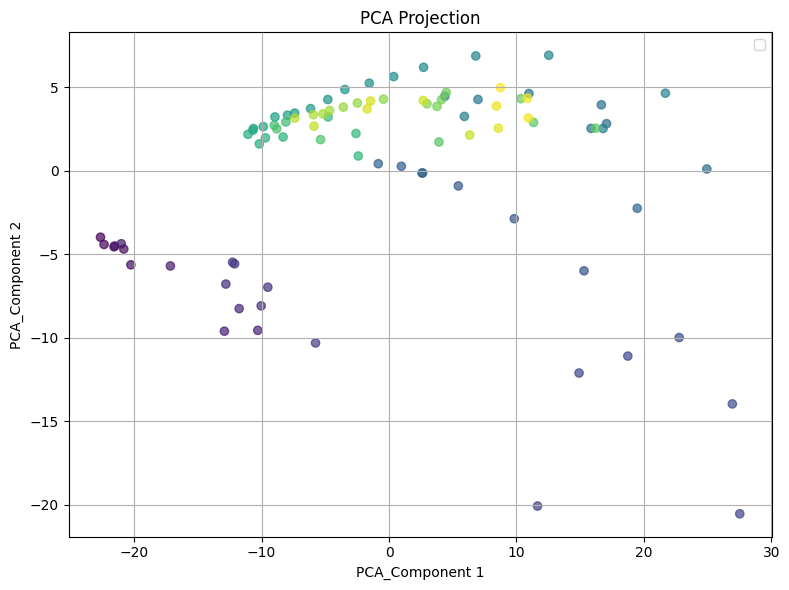

In [972]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_53892\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


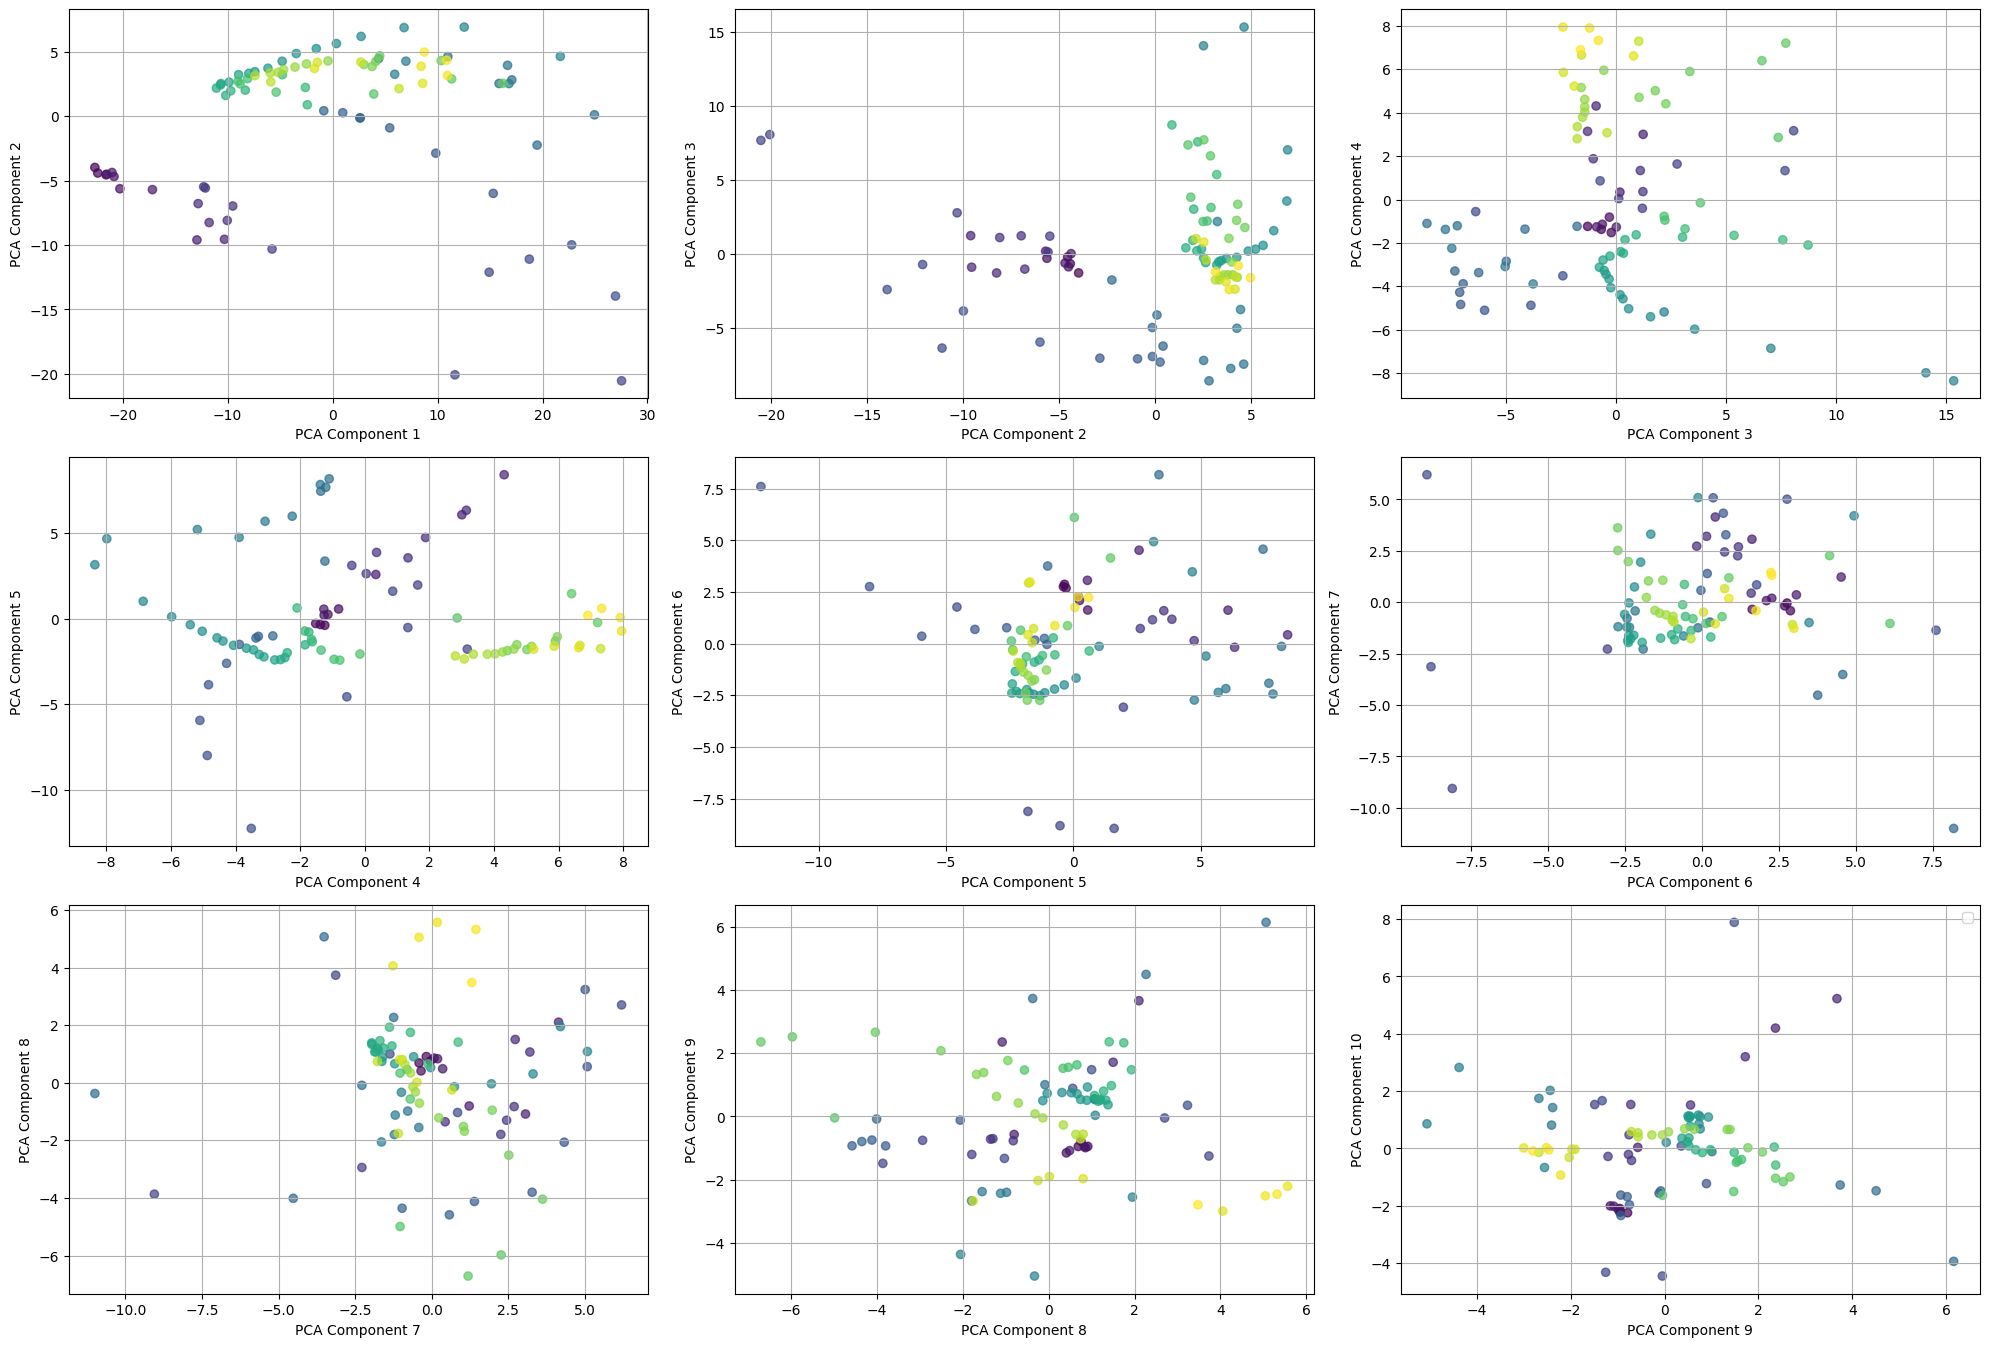

In [973]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [974]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.275
KMeans Davies-Bouldin Index is 1.435


<Axes: xlabel='k'>

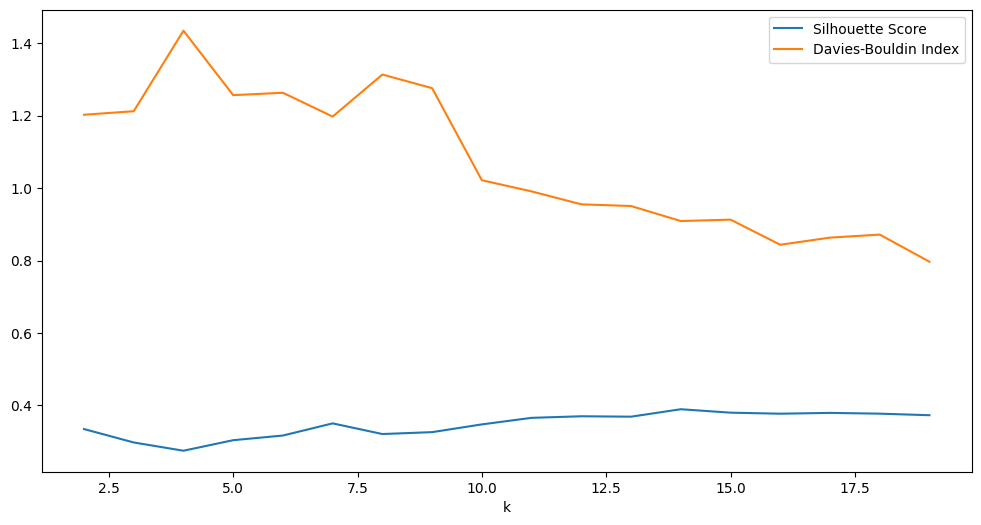

In [975]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

In [976]:
# eps_values = np.linspace(0.5, 13.0, 50)
# min_samples = 3

# dbscan_results = []

# for eps in eps_values:
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = dbscan.fit_predict(pca_result)

#     n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#     n_noise = list(labels).count(-1)

#     if n_clusters > 1:
#         silhouette = silhouette_score(pca_result, labels)
#         db_index = davies_bouldin_score(pca_result, labels)
#     else:
#         silhouette = None
#         db_index = None

#     dbscan_results.append({
#         "eps": round(eps, 2), 
#         "Min_Samples": min_samples,
#         "Clusters": n_clusters,
#         "Noise": n_noise,
#         "Silhouette Score": silhouette,
#         "Davies-Bouldin Index": db_index
#     })

# dbscan_eval_df = pd.DataFrame(dbscan_results)
# display(dbscan_eval_df)
# dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

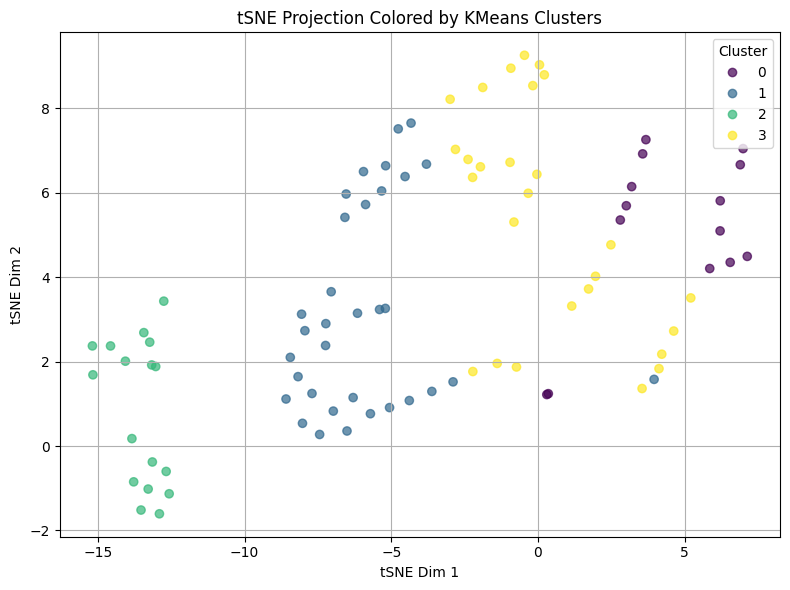

In [977]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        28    167          0.272905   
1    0.05            2        26    149          0.209502   
2    0.06            2        26    134          0.208714   
3    0.06            2        24    117          0.105475   
4    0.07            2        21    109          0.073147   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      1          0.820168   
196  0.99            2         2      1          0.820168   
197  0.99            2         2      1          0.820168   
198  1.00            2         2      1          0.820168   
199  1.00            2         2      1          0.820168   

     Davies-Bouldin Index  
0                0.624388  
1                0.721296  
2                0.695602  
3                0.765011  
4                0.745420  
..                    ...  
195              0.199420  
196              0.199420  
197              0.199420  
198              0.199420  
199              0.199420  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

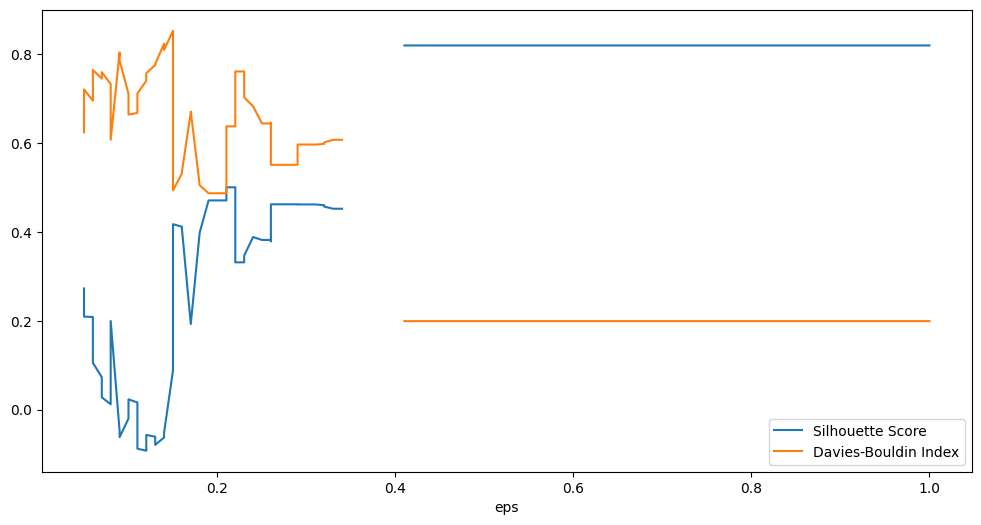

In [978]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [979]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [980]:
season = 4
season_year = 2001
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2001-12-01 to 2002-02-28
Columns: 282 entries, 10000009 to 22000047
dtypes: float64(282)
memory usage: 199.0 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-12-01  1.093441  0.667713  0.608798  0.938526  0.583421  1.164596   
2001-12-02  1.131264  0.695361  0.621764  0.950863  0.617314  1.259398   
2001-12-03  1.133285  0.684424  0.622319  0.954083  0.603122  1.296593   
2001-12-04  1.199934  0.699910  0.673198  0.973874  0.619501  1.330112   
2001-12-05  1.241406  0.723769  0.773941  1.003421  0.669963  1.415757   
...              ...       ...       ...       ...       ...       ...   
2002-02-24  2.697595  1.568859  2.265861  1.779724  1.338853  2.701201   
2002-02-25  1.627103  1.227018  1.428106  1.406122  1.037576  2.741416   
2002-02-26  1.805683  1.484145  1.494045  1.609311  1.727786  2.805104   
2002-02-27  3.984353  2.341113  3.666956  2.543967  3.547939  2.965713   
2002-02-28  4.811172  2.430609  3.780634  2.634338  3.183774  3.198262   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-12-01  1.529535  0.709033  

          2001-12-01  2001-12-02  2001-12-03  2001-12-04  2001-12-05  \
10000009   -0.054600   -0.066235   -0.061927   -0.057833   -0.067616   
10000010   -0.080249   -0.092539   -0.093734   -0.099218   -0.110916   
10000011   -0.083798   -0.096980   -0.098135   -0.101429   -0.106719   
10000014   -0.063933   -0.077121   -0.074625   -0.076543   -0.087523   
10000016   -0.085327   -0.097249   -0.099495   -0.105873   -0.115417   
...              ...         ...         ...         ...         ...   
7000003    -0.070513   -0.078488   -0.076622   -0.077924   -0.080851   
8000001    -0.063820   -0.065443   -0.058996   -0.054762   -0.058968   
9000001    -0.013199   -0.014222   -0.012372   -0.002001   -0.001613   
9000015    -0.017412   -0.019541   -0.017643   -0.008455   -0.009254   
22000047   -0.065714   -0.079650   -0.079416   -0.082713   -0.095290   

          2001-12-06  2001-12-07  2001-12-08  2001-12-09  2001-12-10  ...  \
10000009   -0.055699   -0.055230   -0.053315   -0.049129  

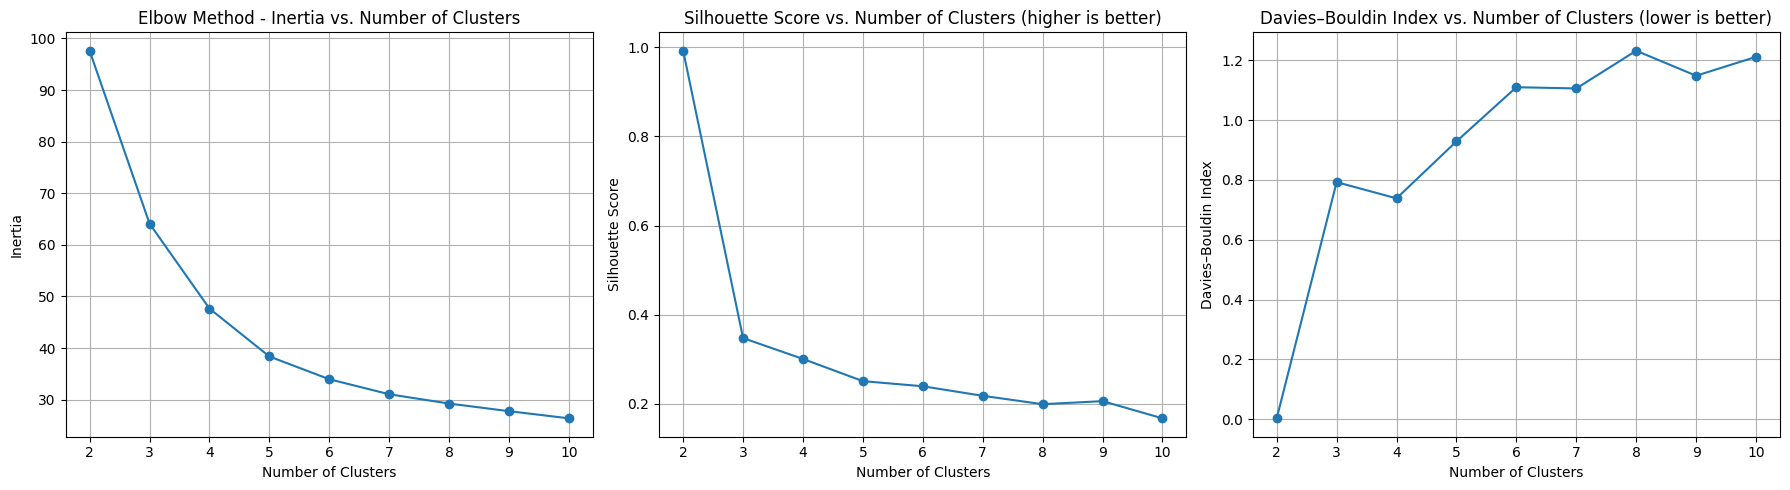

In [981]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-12-01  1.093441  0.667713  0.608798  0.938526  0.583421  1.164596   
2001-12-02  1.131264  0.695361  0.621764  0.950863  0.617314  1.259398   
2001-12-03  1.133285  0.684424  0.622319  0.954083  0.603122  1.296593   
2001-12-04  1.199934  0.699910  0.673198  0.973874  0.619501  1.330112   
2001-12-05  1.241406  0.723769  0.773941  1.003421  0.669963  1.415757   
...              ...       ...       ...       ...       ...       ...   
2002-02-24  2.697595  1.568859  2.265861  1.779724  1.338853  2.701201   
2002-02-25  1.627103  1.227018  1.428106  1.406122  1.037576  2.741416   
2002-02-26  1.805683  1.484145  1.494045  1.609311  1.727786  2.805104   
2002-02-27  3.984353  2.341113  3.666956  2.543967  3.547939  2.965713   
2002-02-28  4.811172  2.430609  3.780634  2.634338  3.183774  3.198262   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-12-01  1.529535  0.709033  

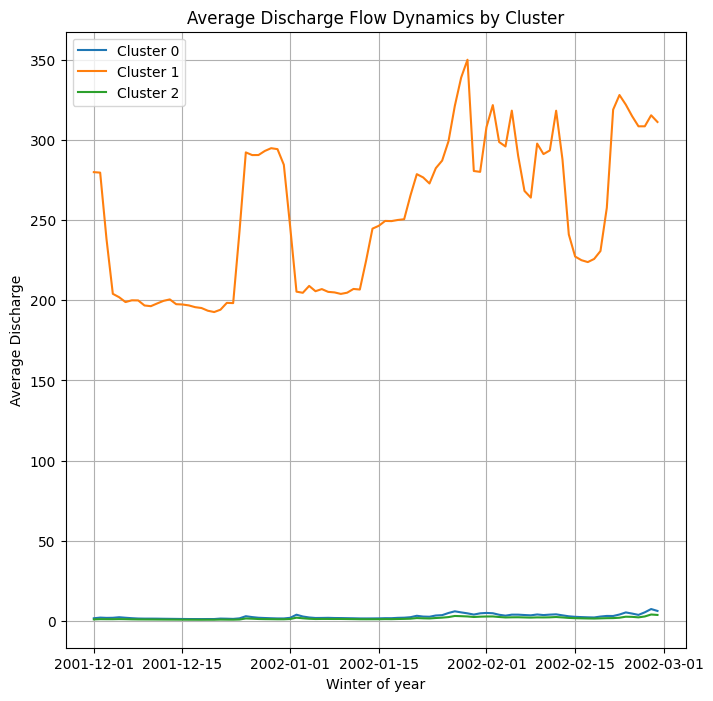

In [982]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [983]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [984]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2001-12-01  1.093441  0.667713  0.608798  0.938526  0.583421  1.164596   
2001-12-02  1.131264  0.695361  0.621764  0.950863  0.617314  1.259398   
2001-12-03  1.133285  0.684424  0.622319  0.954083  0.603122  1.296593   
2001-12-04  1.199934  0.699910  0.673198  0.973874  0.619501  1.330112   
2001-12-05  1.241406  0.723769  0.773941  1.003421  0.669963  1.415757   
...              ...       ...       ...       ...       ...       ...   
2002-02-24  2.697595  1.568859  2.265861  1.779724  1.338853  2.701201   
2002-02-25  1.627103  1.227018  1.428106  1.406122  1.037576  2.741416   
2002-02-26  1.805683  1.484145  1.494045  1.609311  1.727786  2.805104   
2002-02-27  3.984353  2.341113  3.666956  2.543967  3.547939  2.965713   
2002-02-28  4.811172  2.430609  3.780634  2.634338  3.183774  3.198262   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2001-12-01  1.529535  0.709033  1.092904  0.986957  ...  0.903519  1.159092   
2001-12-02  2.283705  0.736012  1.357312  1.018812  ...  0.914029  1.014143   
2001-12-03  1.851712  0.739262  1.216410  1.015387  ...  0.922808  0.910085   
2001-12-04  1.870963  0.789821  1.215080  1.028875  ...  0.956689  0.870714   
2001-12-05  2.348975  0.831991  1.280039  1.075596  ...  0.962500  0.768211   
...              ...       ...       ...       ...  ...       ...       ...   
2002-02-24  3.470773  1.841278  2.945778  2.063206  ...  1.716277  2.980767   
2002-02-25  2.868090  1.333801  1.745701  1.632801  ...  1.698224  2.520493   
2002-02-26  3.173805  2.739699  2.365505  1.769147  ...  1.794549  4.857693   
2002-02-27  4.391392  3.965202  4.591506  2.813931  ...  1.868615  7.990764   
2002-02-28  4.221336  3.288742  4.402572  2.811879  ...  1.878384  4.335685   

            67000017   67000018  67000019   7000003   8000001   9000001  \
2001-12-01  1.303827   1.102679  2.092952  0.829312  0.940406  1.780635   
2001-12-02  1.098753   0.941320  1.918154  0.928213  1.144392  1.993236   
2001-12-03  0.973082   0.842689  1.768907  0.925900  1.174644  1.832600   
2001-12-04  0.919202   0.789156  1.638024  0.957193  1.237042  1.874507   
2001-12-05  0.847001   0.737238  1.527259  1.083190  1.344793  2.030461   
...              ...        ...       ...       ...       ...       ...   
2002-02-24  3.623702   2.787522  3.242666  2.613519  2.561880  5.144761   
2002-02-25  2.853342   1.841279  3.025882  1.769424  1.900722  3.824331   
2002-02-26  3.612797   7.878128  4.857748  2.010452  2.126342  3.846920   
2002-02-27  9.693542  16.118850  8.125084  4.025506  3.934964  5.434398   
2002-02-28  5.712281   7.751289  7.200620  4.315488  4.106725  6.335362   

             9000015  22000047  
2001-12-01  1.710707  0.908966  
2001-12-02  1.905079  0.908966  
2001-12-03  1.758217  0.886483  
2001-12-04  1.796530  0.899330  
2001-12-05  1.939112  0.910572  
...              ...       ...  
2002-02-24  4.786373  1.111315  
2002-02-25  3.579164  1.071166  
2002-02-26  3.599817  1.230155  
2002-02-27  5.051174  1.244609  
2002-02-28  5.874885  1.180371  

[90 rows x 282 columns]

<Axes: >

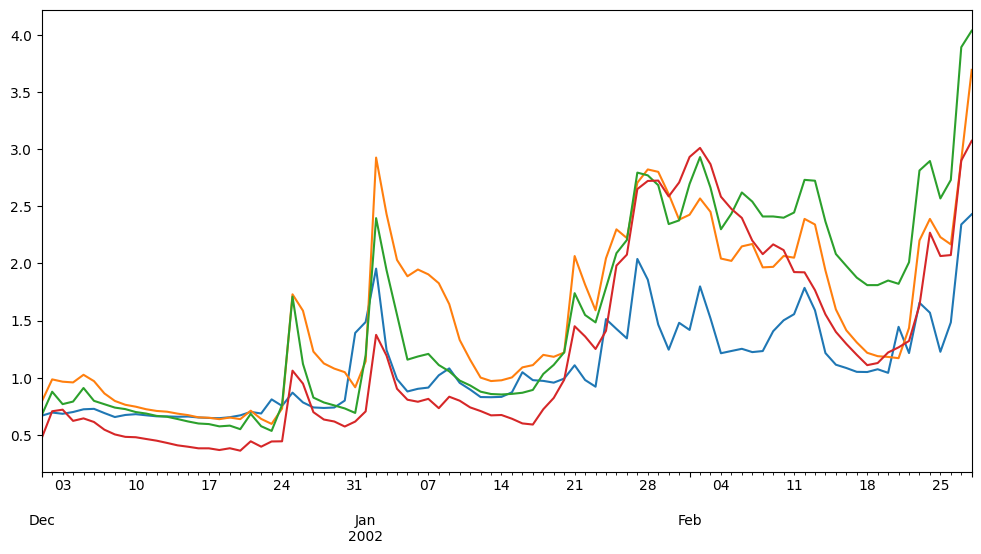

In [985]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

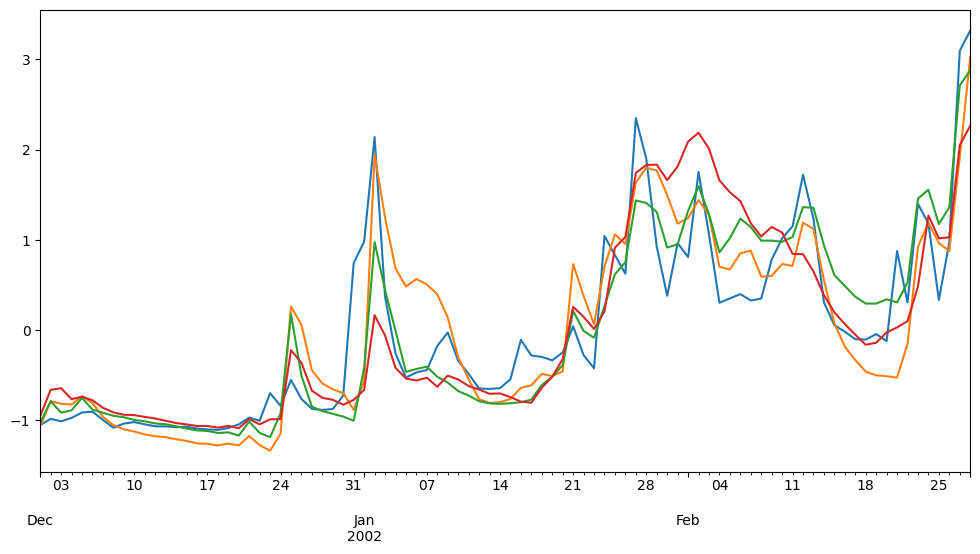

In [986]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

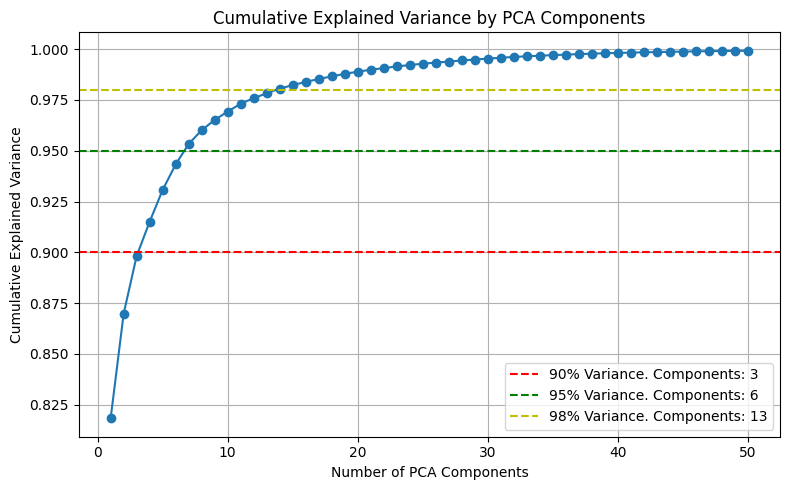

In [987]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [988]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-1.29756453e+01, -7.58986156e-01,  6.45975728e-01, ...,
         7.79898166e-02,  5.44773581e-01,  1.57448656e-01],
       [-9.63432293e+00, -1.96979265e+00,  7.65971463e-01, ...,
         1.35840424e-01,  4.65888946e-01,  6.15605426e-01],
       [-1.07027664e+01, -1.28659639e+00, -8.31491336e-02, ...,
         2.35509118e-01,  7.54749051e-02,  9.08498420e-03],
       ...,
       [ 2.58852406e+01, -3.06464393e+00,  8.97218507e+00, ...,
         7.88463069e-01,  3.55607871e-01, -7.85603101e-01],
       [ 4.88819582e+01, -1.21042676e+01,  6.76787044e+00, ...,
        -1.65202376e-01,  4.44584803e-02, -1.08612225e-01],
       [ 4.28646307e+01, -2.65723338e+00,  4.00180201e-01, ...,
        -7.36359170e-01,  1.36109059e-01,  4.96985604e-01]],
      shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_53892\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


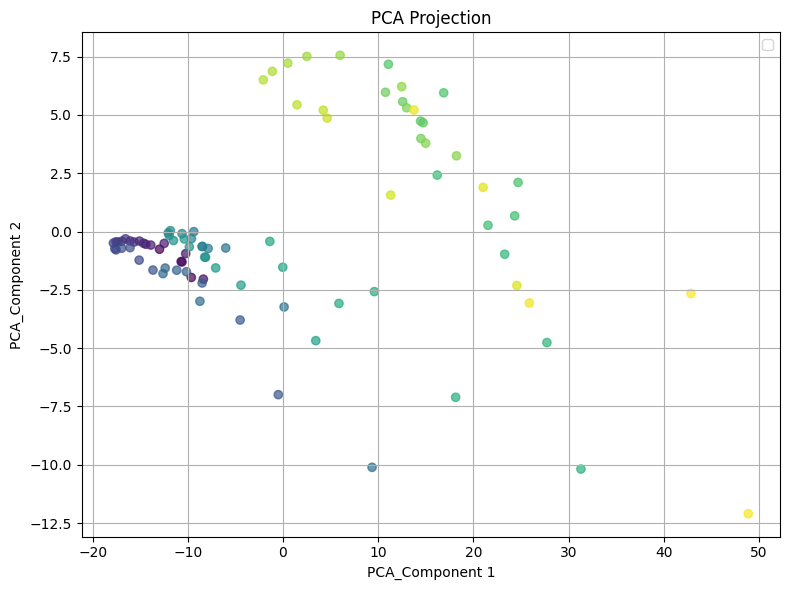

In [989]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_53892\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


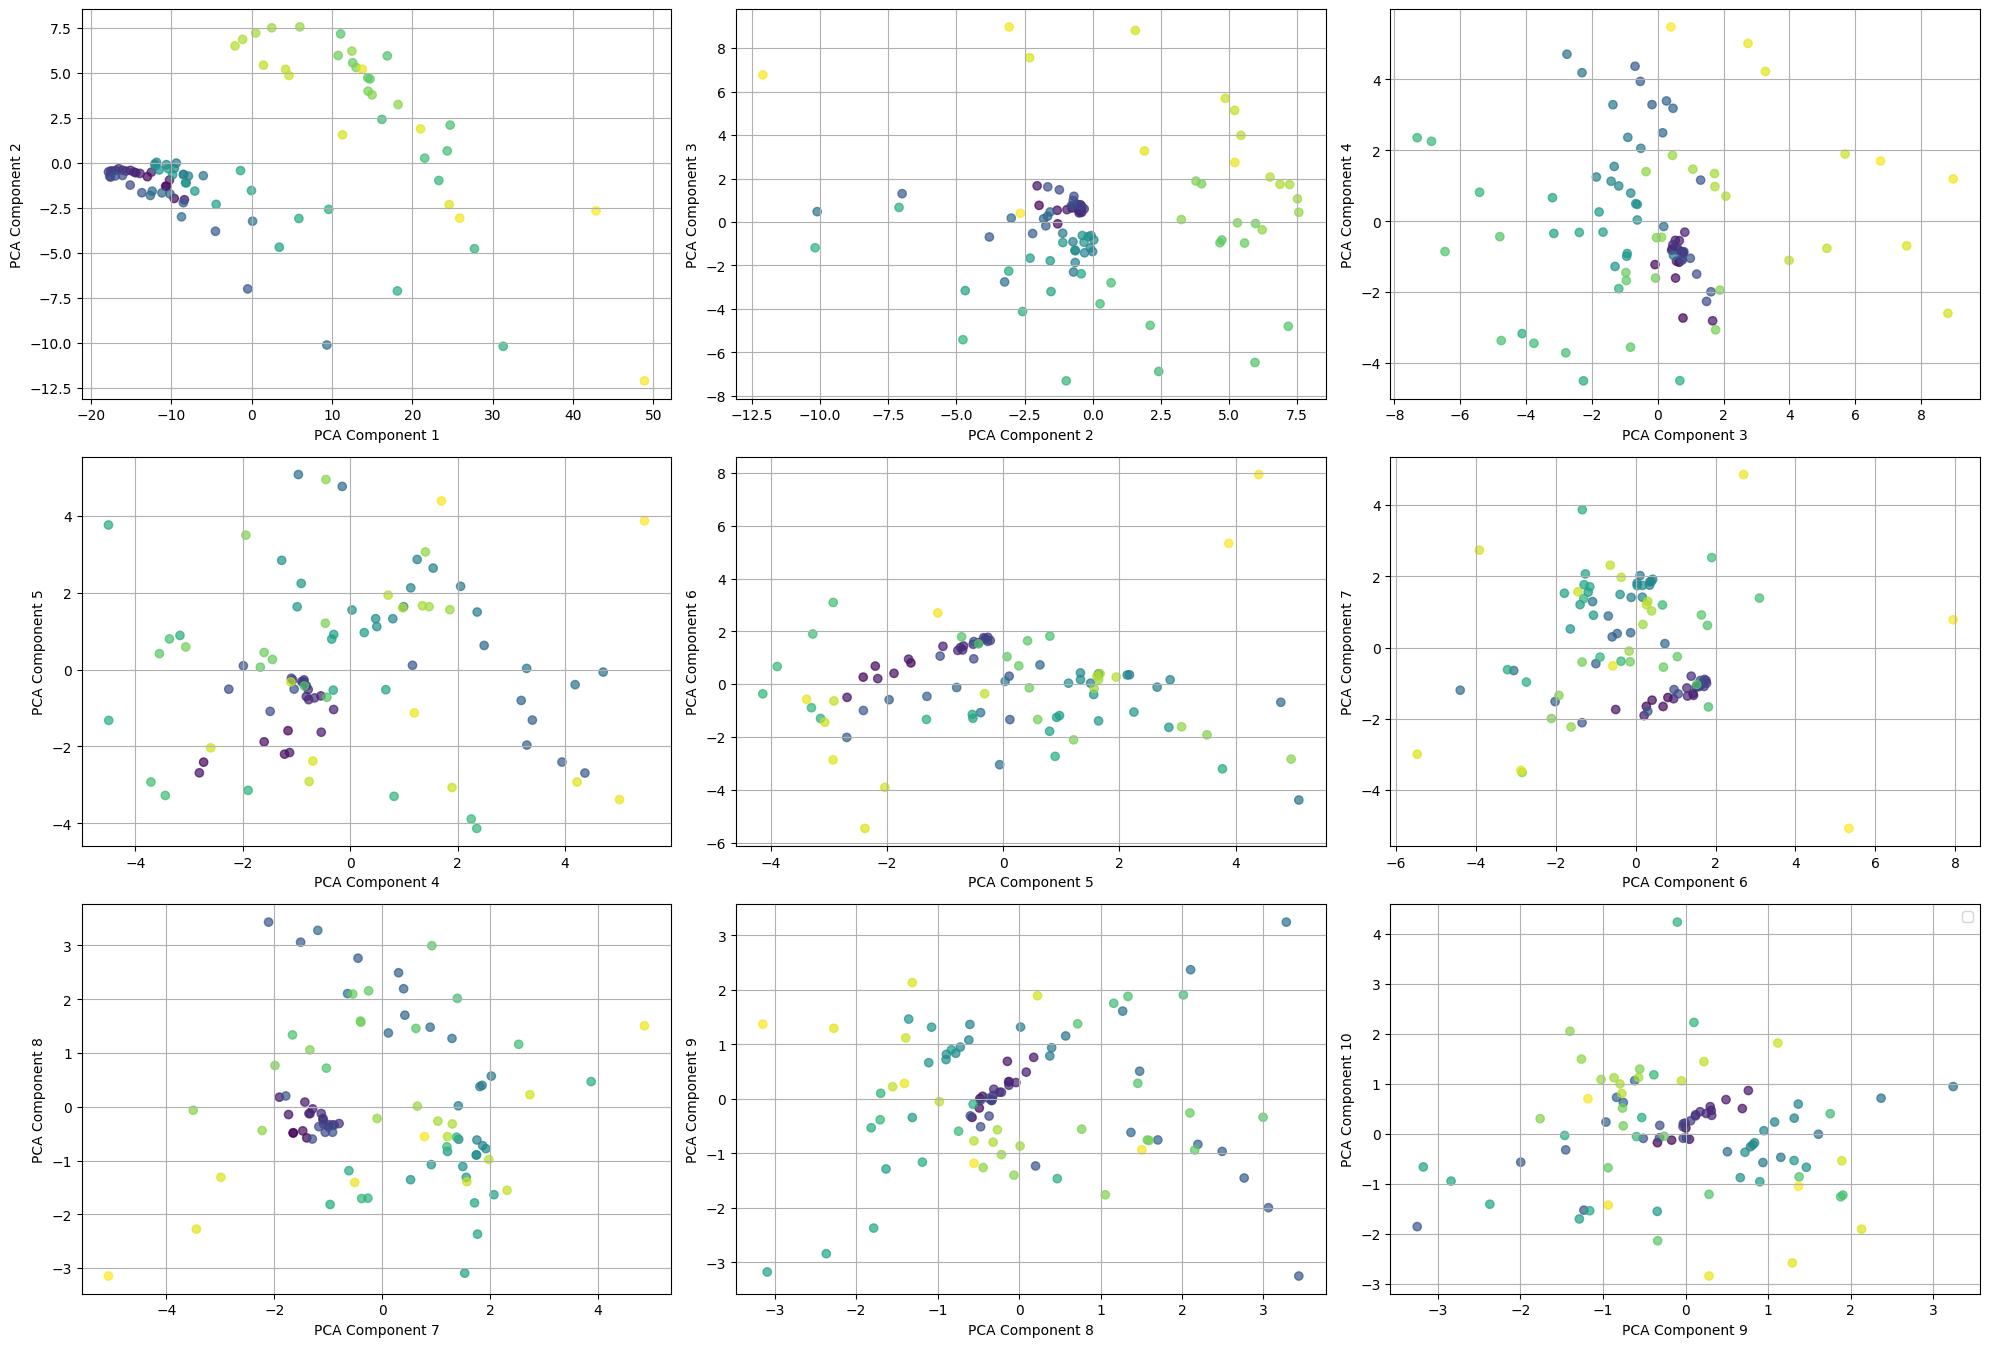

In [990]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [991]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.394
KMeans Davies-Bouldin Index is 1.115


<Axes: xlabel='k'>

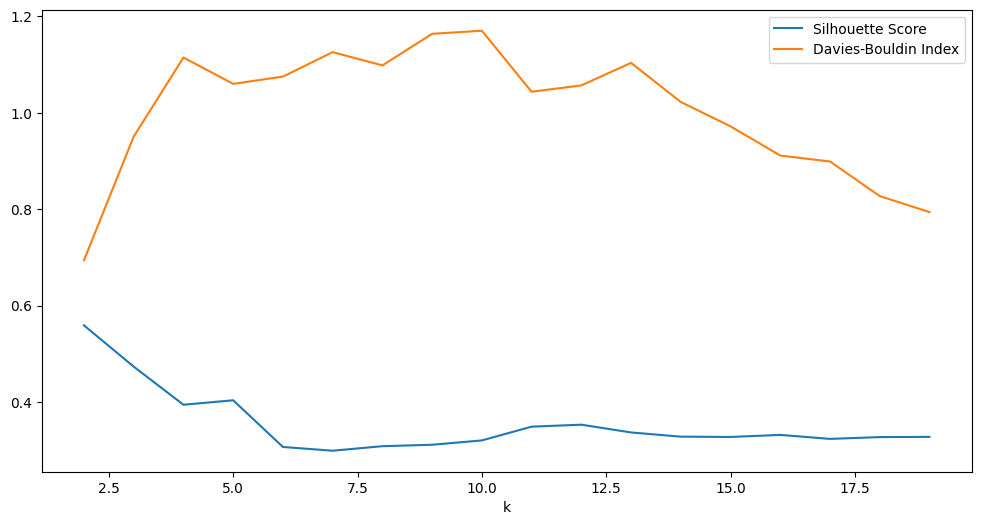

In [992]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         1     86               NaN   
1    0.76            3         2     78         -0.104199   
2    1.01            3         2     74         -0.048646   
3    1.27            3         2     73         -0.029341   
4    1.52            3         2     70          0.012462   
5    1.78            3         2     66          0.069125   
6    2.03            3         3     63         -0.020848   
7    2.29            3         4     57          0.051129   
8    2.54            3         5     49          0.146190   
9    2.80            3         6     43          0.096282   
10   3.05            3         5     41          0.089529   
11   3.31            3         5     39          0.111459   
12   3.56            3         5     39          0.111459   
13   3.82            3         5     38          0.117066   
14   4.07            3         5     38          0.117066   
15   4.33            3         5     35          0.149223   
16   4.58            3         6     30          0.191625   
17   4.84            3         6     26          0.208238   
18   5.09            3         6     25          0.229295   
19   5.35            3         4     24          0.125539   
20   5.60            3         4     24          0.125539   
21   5.86            3         3     23          0.323417   
22   6.11            3         4     20          0.318947   
23   6.37            3         4     19          0.333264   
24   6.62            3         4     18          0.340598   
25   6.88            3         4     17          0.345392   
26   7.13            3         3     17          0.376289   
27   7.39            3         3     17          0.376289   
28   7.64            3         3     16          0.379980   
29   7.90            3         3     16          0.379980   
30   8.15            3         3     15          0.381608   
31   8.41            3         3     14          0.387392   
32   8.66            3         3     12          0.384540   
33   8.92            3         3     10          0.375705   
34   9.17            3         3     10          0.375705   
35   9.43            3         3     10          0.375705   
36   9.68            3         2      9          0.431311   
37   9.94            3         1      6               NaN   
38  10.19            3         1      6               NaN   
39  10.45            3         1      6               NaN   
40  10.70            3         1      5               NaN   
41  10.96            3         1      5               NaN   
42  11.21            3         1      5               NaN   
43  11.47            3         1      5               NaN   
44  11.72            3         1      5               NaN   
45  11.98            3         1      4               NaN   
46  12.23            3         1      4               NaN   
47  12.49            3         1      4               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               0.975456  
2               0.942334  
3               0.923886  
4               0.957112  
5               0.956350  
6               1.250369  
7               1.090364  
8               0.954803  
9               1.277570  
10              1.390928  
11              1.385913  
12              1.385913  
13              1.393925  
14              1.393925  
15              1.504451  
16              1.440213  
17              1.354143  
18              1.356822  
19              1.636434  
20              1.636434  
21              1.522455  
22              1.660883  
23              1.565279  
24              1.517900  
25              1.485153  
26              1.554300  
27              1.554300  
28              1.546209  
29              1.546209  
30              1.527181  
31              1.510985  
32 

<Axes: xlabel='eps'>

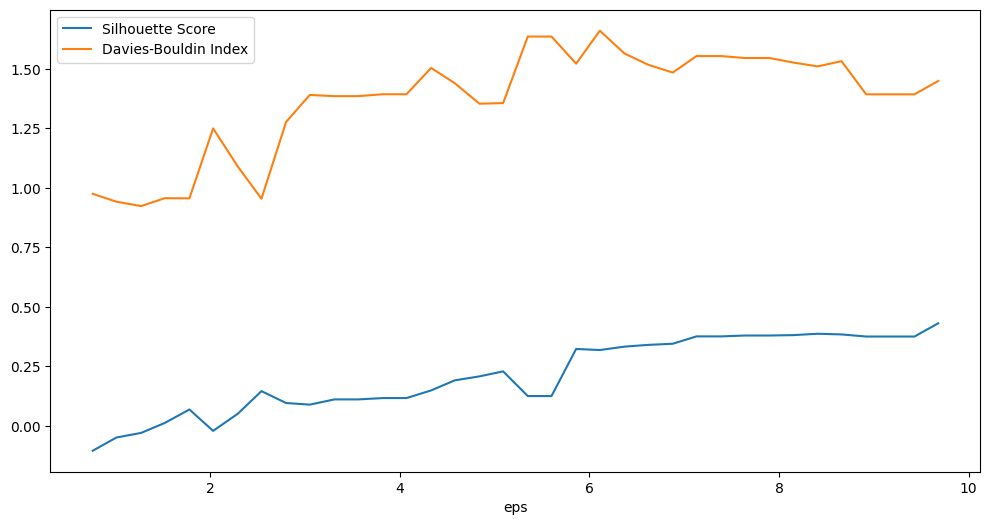

In [993]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

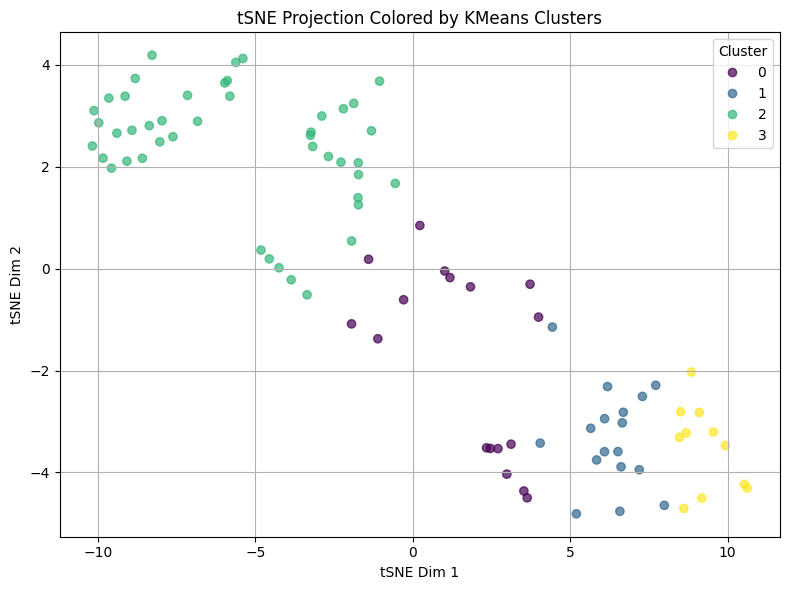

In [994]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

### Special case with Winter 2000 since we have January and February 2001

##### Probably need to be discarded since we are missing all of year 2000

In [995]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [996]:
season = 4
season_year = 2000
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2001-01-01 to 2001-02-28
Columns: 280 entries, 10000009 to 22000047
dtypes: float64(280)
memory usage: 129.5 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556  1.620963   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393  1.571462   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488  1.645681   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999  1.754916   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160  1.850017   
2001-01-06  2.556034  1.414943  3.005924  1.785582  1.542298  1.948174   
2001-01-07  2.592353  1.306915  2.411293  1.804828  1.165265  2.044053   
2001-01-08  2.025153  1.135459  1.843888  1.504262  0.953179  2.047194   
2001-01-09  1.736892  1.047224  1.484621  1.351509  0.887368  2.091358   
2001-01-10  1.499357  0.965695  1.241773  1.225637  0.780831  2.088877   
2001-01-11  1.233205  0.886377  1.091784  1.084599  0.706863  2.057309   
2001-01-12  1.051889  0.836148  0.875577  1.001519  0.672086  2.025261   
2001-01-13  0.950038  0.820636  0.7833

          2001-01-01  2001-01-02  2001-01-03  2001-01-04  2001-01-05  \
10000009   -0.047235   -0.035301    0.030435   -0.008418   -0.041020   
10000010   -0.067066   -0.078032   -0.085457   -0.088932   -0.091210   
10000011   -0.075591   -0.071666   -0.039391   -0.058124   -0.051222   
10000014   -0.050477   -0.054729   -0.038557   -0.053498   -0.070461   
10000016   -0.077542   -0.071247   -0.065228   -0.097902   -0.093586   
...              ...         ...         ...         ...         ...   
7000003    -0.065641   -0.069518    0.026365    0.045139    0.023162   
8000001    -0.069212   -0.066755   -0.045084   -0.011254   -0.009971   
9000001     0.058483    0.048862    0.084203    0.067414    0.018242   
9000015     0.049157    0.038436    0.067337    0.052970    0.008018   
22000047   -0.060200   -0.073769   -0.110834   -0.105746   -0.105074   

          2001-01-06  2001-01-07  2001-01-08  2001-01-09  2001-01-10  ...  \
10000009   -0.040179   -0.022280   -0.040586   -0.046911  

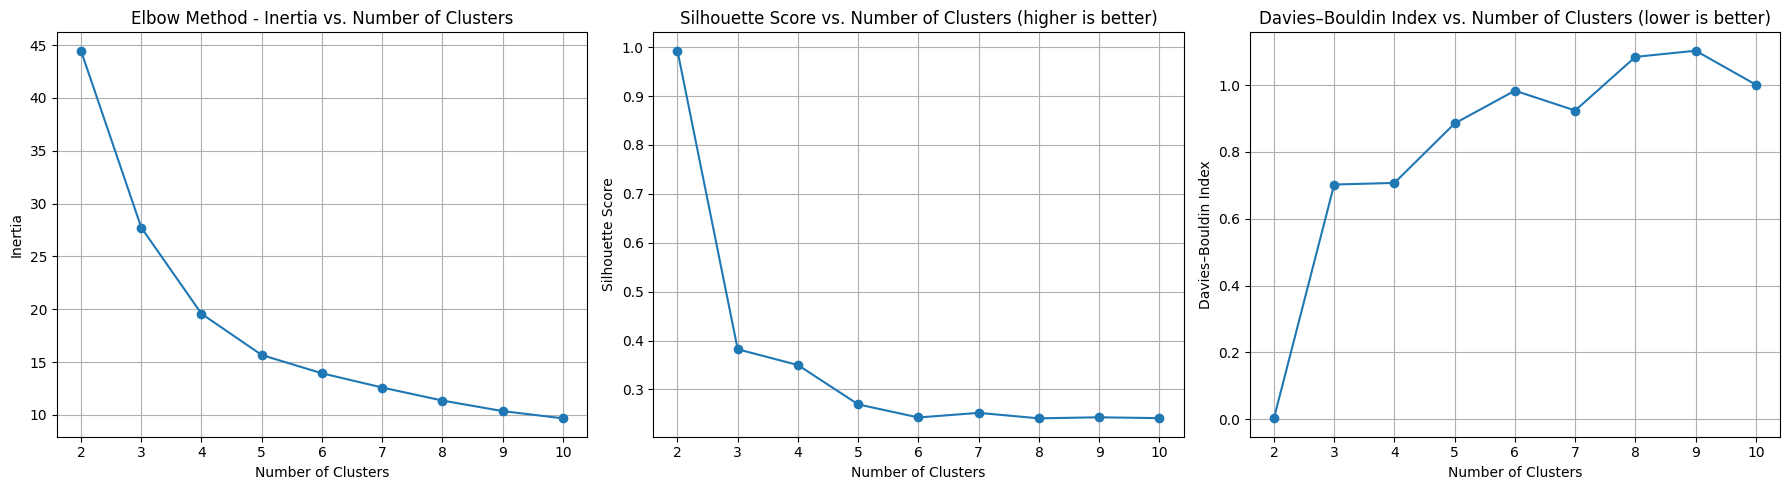

In [997]:
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556  1.620963   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393  1.571462   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488  1.645681   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999  1.754916   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160  1.850017   
2001-01-06  2.556034  1.414943  3.005924  1.785582  1.542298  1.948174   
2001-01-07  2.592353  1.306915  2.411293  1.804828  1.165265  2.044053   
2001-01-08  2.025153  1.135459  1.843888  1.504262  0.953179  2.047194   
2001-01-09  1.736892  1.047224  1.484621  1.351509  0.887368  2.091358   
2001-01-10  1.499357  0.965695  1.241773  1.225637  0.780831  2.088877   
2001-01-11  1.233205  0.886377  1.091784  1.084599  0.706863  2.057309   
2001-01-12  1.051889  0.836148  0.875577  1.001519  0.672086  2.025261   
2001-01-13  0.950038  0.820636  0.7833

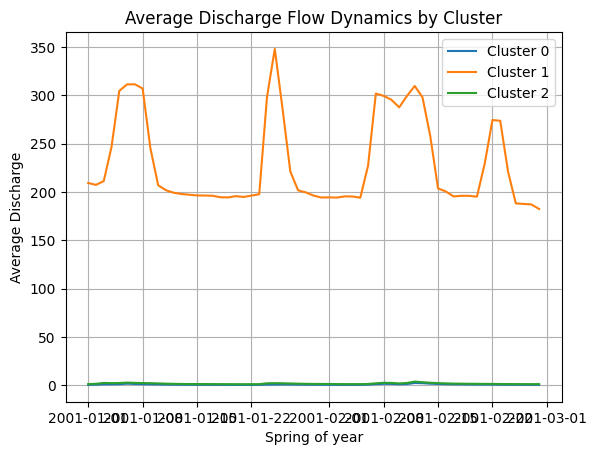

In [998]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [999]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [1000]:

df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df


10000009  10000010  10000011  10000014  10000016  11000011  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556  1.620963   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393  1.571462   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488  1.645681   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999  1.754916   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160  1.850017   
2001-01-06  2.556034  1.414943  3.005924  1.785582  1.542298  1.948174   
2001-01-07  2.592353  1.306915  2.411293  1.804828  1.165265  2.044053   
2001-01-08  2.025153  1.135459  1.843888  1.504262  0.953179  2.047194   
2001-01-09  1.736892  1.047224  1.484621  1.351509  0.887368  2.091358   
2001-01-10  1.499357  0.965695  1.241773  1.225637  0.780831  2.088877   
2001-01-11  1.233205  0.886377  1.091784  1.084599  0.706863  2.057309   
2001-01-12  1.051889  0.836148  0.875577  1.001519  0.672086  2.025261   
2001-01-13  0.950038  0.820636  0.783334  0.942673  0.643786  1.947195   
2001-01-14  0.909874  0.809596  0.725803  0.925377  0.637310  1.874247   
2001-01-15  0.911525  0.802751  0.714807  0.934350  0.648201  1.802490   
2001-01-16  0.922623  0.801137  0.705352  0.945473  0.647444  1.739241   
2001-01-17  0.905543  0.795690  0.702241  0.940858  0.648432  1.678878   
2001-01-18  0.892169  0.810554  0.694172  0.923189  0.639728  1.610505   
2001-01-19  0.877647  0.793963  0.682253  0.912820  0.639475  1.554733   
2001-01-20  0.876797  0.743449  0.693433  0.918525  0.649736  1.496084   
2001-01-21  0.877776  0.794326  0.680497  0.916796  0.664559  1.443786   
2001-01-22  0.908334  0.810200  0.715916  0.927154  0.712161  1.398711   
2001-01-23  0.954368  0.842950  0.783458  0.958957  0.765104  1.357609   
2001-01-24  1.620207  1.232482  2.178485  1.586329  1.609286  1.418894   
2001-01-25  2.747686  1.281865  2.327459  1.877358  1.163814  1.588767   
2001-01-26  1.810806  1.114682  1.723034  1.444260  1.015078  1.702957   
2001-01-27  1.530424  0.996718  1.365861  1.289672  0.907995  1.766693   
2001-01-28  1.325520  0.941163  1.135826  1.158955  0.817185  1.787328   
2001-01-29  1.178693  0.882397  0.965355  1.068211  0.769036  1.772090   
2001-01-30  1.109229  0.867136  0.887619  1.022397  0.744667  1.741955   
2001-01-31  1.066242  0.845565  0.837109  1.000365  0.728435  1.705550   
2001-02-01  1.030231  0.811529  0.800951  0.981908  0.714495  1.671980   
2001-02-02  1.066830  0.800316  0.795223  0.996436  0.676964  1.581227   
2001-02-03  1.071338  0.994466  0.793375  0.998825  0.661763  1.526702   
2001-02-04  1.079814  1.586088  0.884323  1.003316  0.656086  1.454002   
2001-02-05  1.088289  1.508237  1.597468  1.007807  1.191042  1.381302   
2001-02-06  1.320972  1.487848  3.402703  1.131109  0.799039  1.344952   
2001-02-07  1.626365  1.419000  3.983721  1.421067  1.525099  1.378078   
2001-02-08  2.822250  1.369678  3.790551  2.010330  1.633865  1.463277   
2001-02-09  2.575714  1.290687  2.179132  1.656709  1.067243  1.510240   
2001-02-10  1.400821  1.002476  1.926983  1.194054  0.802677  1.508264   
2001-02-11  1.512230  1.060879  1.637537  1.334050  1.237299  1.526386   
2001-02-12  3.428857  1.354805  2.462450  2.256761  1.656383  1.664213   
2001-02-13  2.838279  1.156547  1.622630  1.700476  1.046575  1.790213   
2001-02-14  1.685421  1.005627  1.204199  1.379833  0.910223  1.840407   
2001-02-15  1.411919  0.937141  1.017620  1.210768  0.846579  1.851352   
2001-02-16  1.278098  0.858694  0.929105  1.105260  0.804170  1.853237   
2001-02-17  1.161654  0.860654  0.846133  1.059257  0.758376  1.810979   
2001-02-18  1.149907  0.854283  0.838095  1.054852  0.773094  1.771607   
2001-02-19  1.116285  0.843295  0.815273  1.027129  0.751648  1.726946   
2001-02-20  1.068319  0.831486  0.790788  1.004701  0.735962  1.678039   
2001-02-21  1.063997  0.820153  0.788355  0.983267  0.724840  1.634054   
2001-02-22  1.017201  0.807023  0.771908  0.975259  0.706064  1.608151   
2001-02-23  0.97

<Axes: >

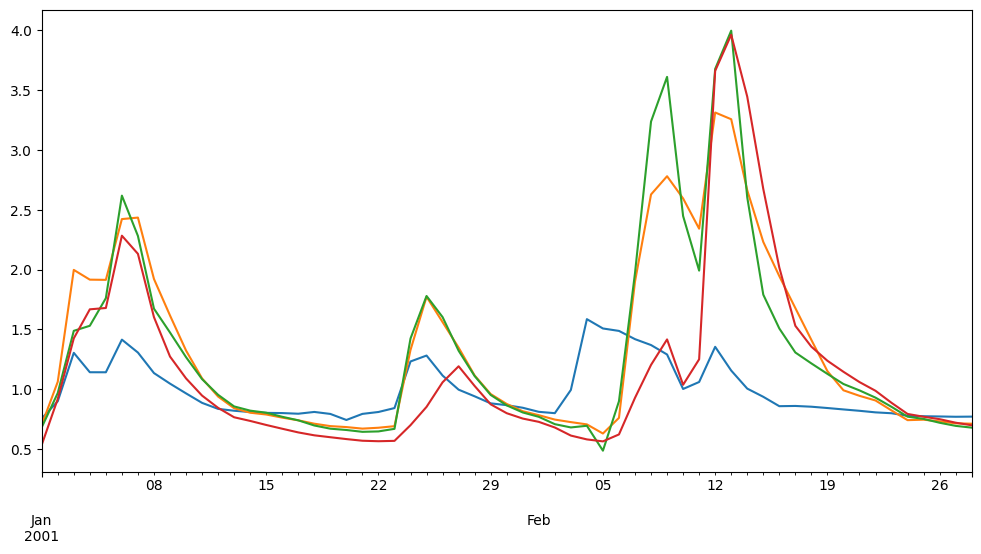

In [1001]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

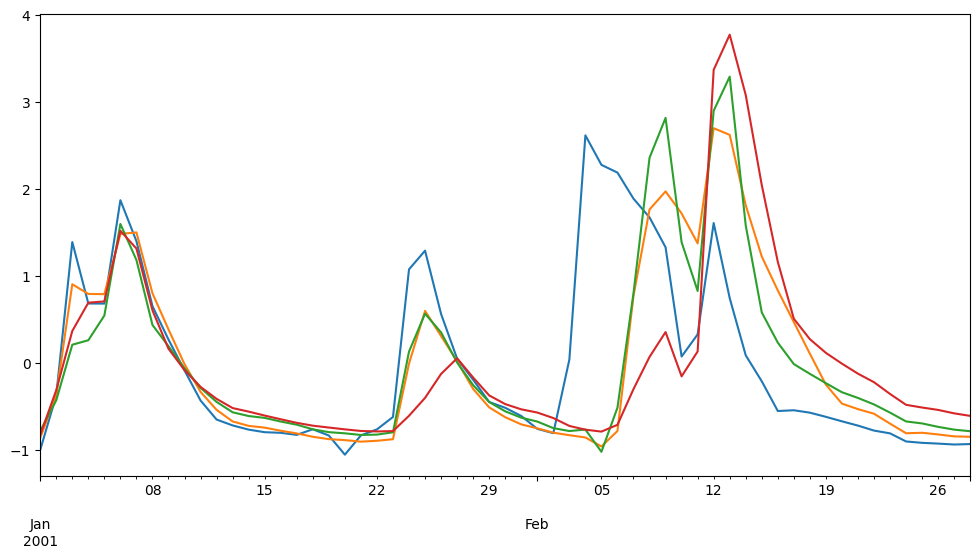

In [1002]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


In [1003]:
#needs to be discarded
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled) #expected error from Nan since values are missing so this will be discarded

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:

plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

In [ ]:

eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

In [ ]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

In [ ]:

tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()